### **Data Download**

Kaggle install

The files are matlab files that can be loaded in using a function from scipy

Loading Patient 1 data

In [1]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('./dataset/clips/Patient_1/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file = './dataset/clips/Patient_1/' + upenn_seizure_file
upenn_baseline_file = './dataset/clips/Patient_1/' + upenn_baseline_file

from scipy.io import loadmat

# Load the .mat file using the full file path
# Corrected: Using upenn_seizure_file instead of upenn_seizure_file_path
mat = loadmat(upenn_seizure_file)
# Corrected: Using upenn_baseline_file instead of upenn_baseline_file_path
mat = loadmat(upenn_baseline_file)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Tue Apr  8 00:35:24 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  22.646,   10.646,    5.646, ...,   22.646,   21.646,   31.646],
        [-169.784, -168.784, -159.784, ..., -133.784, -139.784, -153.784],
        [-136.374, -130.374, -124.374, ..., -483.374, -495.374, -486.374],
        ...,
        [-159.456, -133.456, -100.456, ...,  -14.456,  -33.456,  -55.456],
        [  -9.202,   -6.202,   -4.202, ...,  -78.202,  -95.202,  -85.202],
        [ -76.226,  -63.226,  -57.226, ...,  -40.226,  -45.226,  -25.226]]),
 'freq': array([499.906994]),
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16'], dtype='<U5'), array(['LFG17'], dtype='<U5'), array(['LFG18'], dtype='<U5'), array(['LF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = './dataset/clips/Patient_1/' + upenn_seizure_file.split('/')[-1]  # Get only the filename
upenn_baseline_file = './dataset/clips/Patient_1/' + upenn_baseline_file.split('/')[-1] # Get only the filename

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)

# It looks like you intended to save one of the returned DataFrames
# Change feature_df to either upenn_seizure_df or upenn_baseline_df
upenn_seizure_df.to_csv('./dataset/Patient1.csv', index=False)

Ictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,-201.118,-44.216,72.758,-2.262,16.618,-132.242,92.706,-9.802,-383.9,-179.072,...,-88.73,-163.932,74.172,-29.542,-150.168,-166.05,225.986,99.368,240.164,46.518
1,-218.118,-64.216,38.758,-40.262,22.618,-153.242,61.706,-0.802,-403.9,-207.072,...,-81.73,-156.932,52.172,6.458,-84.168,-150.05,239.986,71.368,203.164,34.518
2,-248.118,-98.216,1.758,-87.262,16.618,-173.242,51.706,9.198,-423.9,-246.072,...,-95.73,-145.932,34.172,24.458,-22.168,-154.05,231.986,52.368,167.164,19.518
3,-254.118,-112.216,-34.242,-82.262,27.618,-141.242,37.706,14.198,-423.9,-267.072,...,-155.73,-166.932,20.172,21.458,29.832,-143.05,201.986,43.368,141.164,11.518
4,-254.118,-110.216,-92.242,-45.262,19.618,-110.242,4.706,23.198,-396.9,-263.072,...,-220.73,-182.932,15.172,-2.542,27.832,-138.05,184.986,66.368,141.164,11.518



Interictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,22.646,-169.784,-136.374,-91.652,-105.652,255.948,-95.406,-144.63,-333.92,-415.57,...,-111.378,-19.196,54.732,-75.824,36.492,29.388,-257.864,-159.456,-9.202,-76.226
1,10.646,-168.784,-130.374,-93.652,-97.652,273.948,-98.406,-169.63,-363.92,-427.57,...,-99.378,-30.196,40.732,-57.824,41.492,1.388,-250.864,-133.456,-6.202,-63.226
2,5.646,-159.784,-124.374,-54.652,-87.652,267.948,-61.406,-187.63,-357.92,-423.57,...,-82.378,-34.196,11.732,-35.824,48.492,-10.612,-259.864,-100.456,-4.202,-57.226
3,9.646,-156.784,-123.374,-62.652,-93.652,233.948,-17.406,-209.63,-337.92,-409.57,...,-82.378,-31.196,9.732,-30.824,34.492,-19.612,-260.864,-82.456,0.798,-49.226
4,12.646,-157.784,-110.374,-72.652,-86.652,162.948,-0.406,-199.63,-318.92,-409.57,...,-107.378,-49.196,11.732,-24.824,44.492,0.388,-266.864,-92.456,-18.202,-47.226


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, data_class, location, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        data_class (str): Class label to be assigned to the data ('baseline' or 'seizure').
        location (str): Location label for the data.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Transpose the DataFrame to make channels as rows
    df = df.transpose()

    # Create a new DataFrame with class and location columns
    df['class'] = data_class
    df['location'] = location
    df['class_id'] = df.index  # Assign index (channel names) to class_id
    df['location'] = [location_mapping.get(channel, 'unknown') for channel in channels_list]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = './dataset/clips/Patient_1/' + upenn_seizure_file.split('/')[-1]  # Get only the filename
upenn_baseline_file = './dataset/clips/Patient_1/' + upenn_baseline_file.split('/')[-1] # Get only the filename

# Location for both seizure and baseline data
location_mapping = {}
for i in range(1, 70):  # Assuming LFG1 to LFG32
    location_mapping[f'LFG{i}'] = 'intracranial epileptogenic zone'
for i in range(1, 70):  # Assuming LFS1 to LFS36
    location_mapping[f'LFS{i}'] = 'surface'

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, 'seizure', location_mapping, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, 'baseline', location_mapping, output=True)

# Combine both DataFrames into one
combined_df = pd.concat([upenn_seizure_df, upenn_baseline_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('./dataset/Patient1up.csv', index=False)

print("Patient1up.csv'")

Ictal


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,class,location,class_id
LFG1,-201.118,-218.118,-248.118,-254.118,-254.118,-255.118,-236.118,-217.118,-206.118,-195.118,...,119.882,91.882,77.882,70.882,96.882,101.882,93.882,seizure,intracranial epileptogenic zone,LFG1
LFG10,-44.216,-64.216,-98.216,-112.216,-110.216,-96.216,-33.216,16.784,5.784,-36.216,...,67.784,38.784,21.784,29.784,64.784,99.784,82.784,seizure,intracranial epileptogenic zone,LFG10
LFG11,72.758,38.758,1.758,-34.242,-92.242,-144.242,-132.242,-100.242,-117.242,-181.242,...,-183.242,-182.242,-181.242,-191.242,-142.242,-94.242,-79.242,seizure,intracranial epileptogenic zone,LFG11
LFG12,-2.262,-40.262,-87.262,-82.262,-45.262,-15.262,30.738,46.738,11.738,-9.262,...,728.738,758.738,795.738,799.738,822.738,849.738,863.738,seizure,intracranial epileptogenic zone,LFG12
LFG13,16.618,22.618,16.618,27.618,19.618,31.618,95.618,178.618,254.618,292.618,...,211.618,226.618,215.618,177.618,158.618,161.618,187.618,seizure,intracranial epileptogenic zone,LFG13



Interictal


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,class,location,class_id
LFG1,22.646,10.646,5.646,9.646,12.646,31.646,-0.354,9.646,-3.354,-17.354,...,29.646,15.646,14.646,14.646,22.646,21.646,31.646,baseline,intracranial epileptogenic zone,LFG1
LFG10,-169.784,-168.784,-159.784,-156.784,-157.784,-156.784,-193.784,-177.784,-170.784,-153.784,...,-49.784,-66.784,-82.784,-109.784,-133.784,-139.784,-153.784,baseline,intracranial epileptogenic zone,LFG10
LFG11,-136.374,-130.374,-124.374,-123.374,-110.374,-99.374,-124.374,-100.374,-88.374,-58.374,...,-458.374,-448.374,-436.374,-453.374,-483.374,-495.374,-486.374,baseline,intracranial epileptogenic zone,LFG11
LFG12,-91.652,-93.652,-54.652,-62.652,-72.652,-70.652,-114.652,-117.652,-120.652,-113.652,...,200.348,173.348,133.348,104.348,55.348,13.348,-32.652,baseline,intracranial epileptogenic zone,LFG12
LFG13,-105.652,-97.652,-87.652,-93.652,-86.652,-63.652,-55.652,-31.652,-43.652,-33.652,...,45.348,1.348,-20.652,-31.652,-36.652,-34.652,-36.652,baseline,intracranial epileptogenic zone,LFG13


Patient1up.csv'


In [4]:
import pandas as pd

def transpose_csv(input_file, output_file):
    """
    Transposes the CSV file: converts columns to rows and rows to columns.

    Parameters:
        input_file (str): Path to the input CSV file.
        output_file (str): Path where the transposed CSV file will be saved.
    """
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Transpose the DataFrame
    transposed_df = df.T

    # Reset the index to make the transposed DataFrame cleaner
    transposed_df.reset_index(inplace=True)

    # Save the transposed DataFrame to a new CSV file
    transposed_df.to_csv(output_file, index=False)

# Define the input and output file paths
input_csv_file = './dataset/Patient1.csv'  # Change this to your input file path
output_csv_file = './dataset/Patient1_transposed.csv'  # Change this to your desired output file path

# Call the function to transpose the CSV
transpose_csv(input_csv_file, output_csv_file)

print("CSV file has been transposed and saved as:", output_csv_file)


CSV file has been transposed and saved as: ./dataset/Patient1_transposed.csv


In [ ]:
Plot Patient 1 data

import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # Convert the data to numeric, handling errors by coercing to NaN
  data = data.apply(pd.to_numeric, errors='coerce')

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Loading Patient 2 data

In [ ]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('./dataset/clips/Patient_2/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = './dataset/clips/Patient_2/' + upenn_seizure_file
upenn_baseline_file_path = './dataset/clips/Patient_2/' + upenn_baseline_file
from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat
mat = loadmat(upenn_baseline_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 23:42:37 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  78.1856,   79.1856,   79.1856, ..., -121.8144, -120.8144,
         -120.8144],
        [ -37.3686,  -37.3686,  -36.3686, ...,  -47.3686,  -47.3686,
          -47.3686],
        [ -40.0754,  -39.0754,  -38.0754, ...,  -44.0754,  -44.0754,
          -44.0754],
        ...,
        [ -11.2274,  -11.2274,  -10.2274, ...,  -65.2274,  -65.2274,
          -64.2274],
        [ -64.2718,  -64.2718,  -64.2718, ...,  -53.2718,  -52.2718,
          -53.2718],
        [ -19.479 ,  -18.479 ,  -17.479 , ...,  -96.479 ,  -95.479 ,
          -94.479 ]]),
 'freq': array([5000.]),
 'channels': array([[(array(['LMacro_01'], dtype='<U9'), array(['LMacro_02'], dtype='<U9'), array(['LMacro_03'], dtype='<U9'), array(['LMacro_04'], dtype='<U9'), array(['LMacro_05'], dtype='<U9'), array(['LMacro_06'], dtype='<U9'), array(['LMacro_07'], dty

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = os.path.join('./dataset/clips/Patient_2/', upenn_seizure_file.split('/')[-1])
upenn_baseline_file = os.path.join('./dataset/clips/Patient_2/', upenn_baseline_file.split('/')[-1])

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)

upenn_seizure_df.to_csv('Patient_2_upenn_seizure.csv', index=False)
upenn_baseline_df.to_csv('Patient_2_upenn_baseline.csv', index=False)

Ictal


,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
0,-95.757,-102.6404,-110.241,-0.403,11.3524,-3.2018,-11.8726,-5.087,37.9558,47.3016,94.4578,54.1332,-2.3298,0.111,-14.4998,-26.2888
1,-92.757,-99.6404,-107.241,0.597,12.3524,-2.2018,-11.8726,-5.087,37.9558,46.3016,94.4578,54.1332,-2.3298,0.111,-15.4998,-27.2888
2,-88.757,-96.6404,-103.241,2.597,13.3524,0.7982,-9.8726,-3.087,37.9558,48.3016,95.4578,55.1332,-0.3298,2.111,-14.4998,-26.2888
3,-84.757,-93.6404,-98.241,5.597,13.3524,2.7982,-6.8726,-0.087,39.9558,50.3016,97.4578,57.1332,1.6702,4.111,-11.4998,-25.2888
4,-80.757,-90.6404,-93.241,8.597,15.3524,3.7982,-5.8726,1.913,40.9558,52.3016,99.4578,59.1332,2.6702,6.111,-10.4998,-23.2888



Interictal


,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
0,78.1856,-37.3686,-40.0754,-45.363,-23.2202,-15.9858,-23.9644,-27.4992,49.7346,77.3476,94.5962,56.7236,-19.63,-11.2274,-64.2718,-19.479
1,79.1856,-37.3686,-39.0754,-46.363,-23.2202,-16.9858,-23.9644,-27.4992,50.7346,76.3476,94.5962,56.7236,-17.63,-11.2274,-64.2718,-18.479
2,79.1856,-36.3686,-38.0754,-47.363,-23.2202,-15.9858,-22.9644,-28.4992,49.7346,76.3476,93.5962,56.7236,-16.63,-10.2274,-64.2718,-17.479
3,79.1856,-37.3686,-38.0754,-48.363,-23.2202,-15.9858,-23.9644,-30.4992,48.7346,75.3476,93.5962,55.7236,-16.63,-11.2274,-64.2718,-18.479
4,78.1856,-38.3686,-40.0754,-48.363,-24.2202,-15.9858,-23.9644,-31.4992,47.7346,74.3476,93.5962,54.7236,-17.63,-12.2274,-65.2718,-20.479


Number of seizure files: 0
Number of baseline files: 0


In [8]:
import mne
from termcolor import colored

# Set MNE to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
    # Create MNE info file with metadata about the EEG
    info = mne.create_info(ch_names=list(data.columns),
                           sfreq=freq,
                           ch_types=['eeg']*data.shape[-1])

    # Convert the data to numeric, handling errors by coercing to NaN
    data = data.apply(pd.to_numeric, errors='coerce')

    # Ensure the data is in volts rather than microvolts
    data = data.apply(lambda x: x*1e-6)

    # Transpose the data for MNE
    data_T = data.transpose()

    # Create raw MNE object
    raw = mne.io.RawArray(data_T, info)

    return raw

# Plot settings
plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # Zooms the plot out
    'highpass': 0.5,               # Filters out low frequencies
    'lowpass': 70.,                # Filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

# Baseline Data (Interictal)
print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs)

# Seizure Data (Ictal)
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)


Interictal


TypeError: each entry in ch_names must be an instance of str, got <class 'int'> instead.

Plot Patient 2 data

In [9]:
!pip install mne
!pip isntall teamcolor
import mne # Import the mne library
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

ERROR: unknown command "isntall" - maybe you meant "install"
Interictal


TypeError: each entry in ch_names must be an instance of str, got <class 'int'> instead.

Printing the number of channels

In [10]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'
# and the channels are represented as columns:

num_channels = len(upenn_seizure_df.columns)
print(f"Number of channels: {num_channels}")

Number of channels: 503


Printing the number of Seizure and Baseline data

In [11]:
import os

def count_seizure_baseline(folder_path):
    """Counts the number of seizure and baseline files in a folder."""
    seizure_count = 0
    baseline_count = 0
    for filename in os.listdir(folder_path):
        if 'ictal' in filename.lower():  # Case-insensitive check for "ictal"
            seizure_count += 1
        elif 'interictal' in filename.lower():  # Case-insensitive check for "interictal"
            baseline_count += 1
    return seizure_count, baseline_count

# Specify the path to the Patient_2 folder
patient2_folder_path = './dataset/clips/Patient_2'

# Count the files
seizure_count, baseline_count = count_seizure_baseline(patient2_folder_path)

# Print the results
print(f"Number of seizure files: {seizure_count}")
print(f"Number of baseline files: {baseline_count}")

Number of seizure files: 3141
Number of baseline files: 0


### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [12]:
!pip install matplotlib pandas==0.23.0
!pip install numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      /tmp/pip-install-u5vd524w/pandas_245874d1ed2343a5a56f55a420388fb5/setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      /home/khansun/miniconda3/envs/eeg/lib/python3.9/site-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ************************************************

FIR filter

Package install

In [13]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

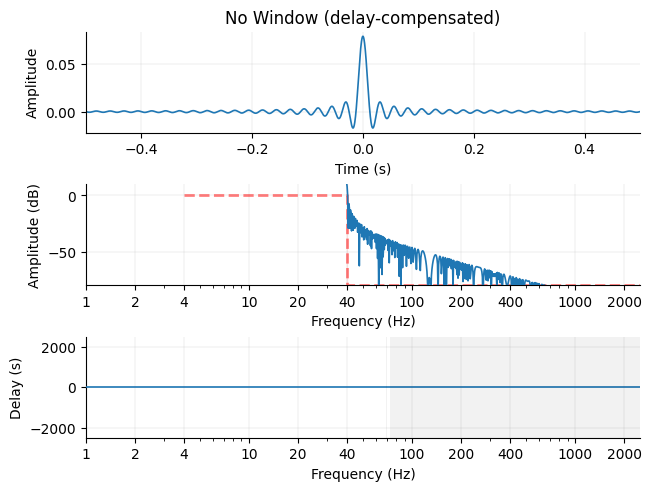

In [14]:
import numpy as np
import pandas as pd
from mne.viz import plot_filter
import matplotlib.pyplot as plt


# Parameters for filter visualization
sfreq = 5000  # Sampling frequency (this should be adapted based on your data)
f_p = 40.  # Pass-band frequency in Hz
nyq = sfreq / 2.  # Nyquist frequency
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

# Filter configuration
n = int(round(1 * sfreq))  # Filter length
n -= n % 2 - 1  # Ensure it's an odd number
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # Create time array for sinc function
h = np.sinc(2 * f_p * t) / (4 * np.pi)  # Sinc filter

# Frequency limits for plot
flim = (1., sfreq / 2.)

# Plot the filter
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

# Text box with filter details
textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Add text box to the plot
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

# Display the plot
plt.show()

# Save the figure
fig.savefig('ringing_40hz.png')

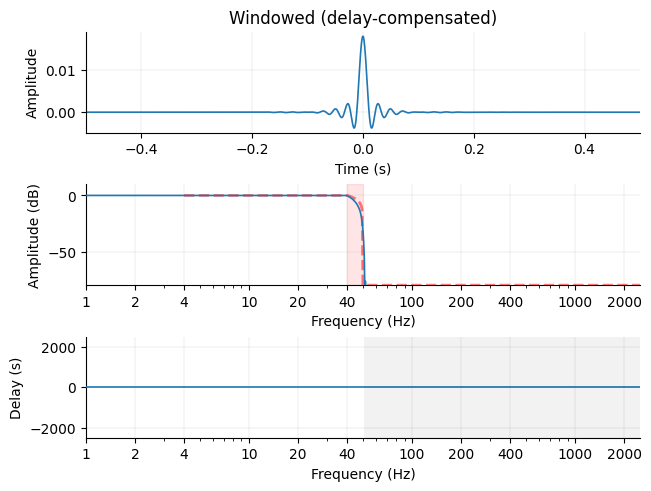

In [15]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

### **Feature Engineering**

In [16]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from pywt import wavedec, swt
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from itertools import combinations
from numpy import inf
import math
from sklearn.preprocessing import StandardScaler

def window(a, w, o, copy = False):
    # if there is no window to be applied
    if w == None:
        view = np.expand_dims(a.T, axis=0)

    # otherwise...
    else:

        sh = (a.size - w + 1, w)
        st = a.strides * 2
        if o:
            view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
        else:
            view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w]
    if copy:
        return view.copy()
    else:
        return view

def window_y(events, window_size, overlap, target=None, baseline=None):

  # window the data so each row is another epoch
  events_windowed = window(events, w = window_size, o = overlap, copy = True)

  if target:
    # turn to array of bools if seizure in the
    # windowed data
    bools = events_windowed == target
    # are there any seizure seconds in the data?
    data_y = np.any(bools,axis=1)
    # turn to 0's and 1's
    data_y = data_y.astype(int)
    # expand the dimensions so running down one column
    data_y = np.expand_dims(data_y, axis=1)

  elif baseline:
    # replace all baseline labels to nan
    data_y = pd.DataFrame(events_windowed).replace(baseline, np.nan)
    # get the most common other than baseline
    data_y = data_y.mode(1)
    # change nan back to baseline class
    data_y = data_y.fillna(baseline).values
    # if there was nothing but baseline there will be an empty array
    if data_y.size == 0:
        data_y = np.array([baseline]*data_y.shape[0])
        data_y = np.expand_dims(data_y, -1)

  else:
    # get the value most frequent in the window
    data_y = pd.DataFrame(events_windowed).mode(1).values

  return data_y


def bandpower(data, sf, weighted, mean, band):
    low, high = band

    # TODO: Not sure this does much...
    if weighted:
        weighted_window = ('tukey', 3)

    else:
        weighted_window = 'hann'

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       window = weighted_window,
                       nperseg=(2 / low)*sf, # this ensures there are at least 2 cycles of the lowest frequency in the window
                       scaling='density',
                       axis=0
                      )

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    #select frequencies of interest
    psd = psd[idx_min:idx_max,:]

    if mean:
        psd = np.nanmean(psd,0)
    else:
        psd = np.nanmedian(psd,0)

    return psd


def feature_append(all_features, data, axis=1, expand=True):
    if expand:
        data = np.expand_dims(data, axis=axis)

    # if the feature set is empty
    if all_features.size == 0:
        all_features = data
    else:
        all_features = np.concatenate((all_features, data), axis)

    return all_features


def pad_along_axis(array, target_length, axis=0):

    pad_size = target_length - array.shape[axis]
    axis_nb = len(array.shape)

    if pad_size < 0:
        return array

    npad = [(0, 0) for x in range(axis_nb)]
    npad[axis] = (0, pad_size)

    b = np.pad(array, pad_width=npad, mode='constant', constant_values=0)

    return b


def wavelet_decompose(data, feature_list, channel_name=None, wavelet='db4', wavelet_transform = 'DWT', level=6, scale=False):
    # bool to check if the data has been padded
    padded = False

    if wavelet_transform == 'DWT':
        # get the wavelet coefficients at each level in a list
        coeffs_list = wavedec(data, wavelet=wavelet, level=level)

    elif wavelet_transform == 'UDWT':
        # The signal length along the transformed axis be a multiple of 2**level
        atrous = (2**level)
        orig_shape = data.shape
        ceiled_len = math.ceil(orig_shape[1]/atrous)
        if orig_shape[1]/atrous != ceiled_len:
            padded_len = ceiled_len*atrous
            data = pad_along_axis(data, padded_len, axis=1)
            padded = True
        # get the wavelet coefficients at each level in a list
        coeffs_list = swt(data, wavelet=wavelet, level=level)

    if channel_name:
        # make an empty list for the features later
        feature_names = []

        # make a list of the component names
        nums = list(range(1,level+1))
        names=[]
        for num in nums:
            names.append('D' + str(num))
        # reverse the names so it counts down
        names = names[::-1]

    # make empty arrays to help store data in later
    mean = np.array([])
    std = np.array([])
    LSWT = np.array([])
    mean_abs = np.array([])

    # for each decomposition level from the wavelets...
    for i, array in enumerate(coeffs_list):
        if wavelet_transform == 'DWT':
            # skip the first A
            if i == 0:
                continue
        elif wavelet_transform == 'UDWT':
            # just get the D's
            array = array[1]
            if padded:
                # remove the padding
                array = array[:orig_shape[0],:orig_shape[1]]

        if 'mean' in feature_list:
            # add the data straight into the wavelet_features array
            mean = feature_append(mean, np.mean(array,1))
        if 'std' in feature_list:
            # add the data straight into the wavelet_features array
            std = feature_append(std, np.std(array,1))
        if any(i in ['mean_abs','ratio'] for i in feature_list):
            # add the data into the mean_abs array
            mean_abs = feature_append(mean_abs, np.mean(np.absolute(array),1))
        if 'LSWT' in feature_list:
            # add the data into the LSWT array
            LSWT = feature_append(LSWT, np.sum(array,1))

    wavelet_features = np.array([])
    if 'mean' in feature_list:
        if scale:
            mean = frequency_scale(mean)
        # add the data straight into the wavelet_features array
        wavelet_features = feature_append(wavelet_features, mean, expand=False)
        # add the feature names
        if channel_name:
            feature_names.extend([channel_name+'|'+name+'_mean' for name in names])

    if 'std' in feature_list:
        if scale:
            std = frequency_scale(std)
        # add the data straight into the wavelet_features array
        wavelet_features = feature_append(wavelet_features, std, expand=False)
        # add the feature names
        if channel_name:
            feature_names.extend([channel_name+'|'+name+'_std' for name in names])

    if 'ratio' in feature_list:
        # make an empty df we will put data in
        ratio = np.empty((mean_abs.shape))
        # for each decomposition level
        for level in range(0, mean_abs.shape[1]):
            # for the first level
            if level == 0:
                ratio[:,level] = mean_abs[:,level]/mean_abs[:,level+1]
            # for the last level
            elif level == mean_abs.shape[1]-1:
                ratio[:,level] = mean_abs[:,level]/mean_abs[:,level-1]
            # all other levels
            else:
                mean_levels = (mean_abs[:,level-1]+mean_abs[:,level+1])/2
                ratio[:,level] = mean_abs[:,level]/mean_levels

        if scale:
            ratio = frequency_scale(ratio)
        # concat the ratio
        wavelet_features = feature_append(wavelet_features, ratio, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_ratio' for name in names])

    if 'mean_abs' in feature_list:
        if scale:
            mean_abs = frequency_scale(mean_abs)
        # now add in the mean_abs to the feature list
        wavelet_features = feature_append(wavelet_features, mean_abs, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_mean_abs' for name in names])

    if 'LSWT' in feature_list:
        # minus the smallest value from each level for each time
        LSWT = LSWT.T - np.amin(LSWT,1)
        # transpose back
        LSWT = LSWT.T
        # plus 1 to each datapoint
        LSWT = LSWT+1
        # log each level for each time
        LSWT = np.log(LSWT)
        if scale:
            LSWT = frequency_scale(LSWT)
        # append the feature onto the wavelet features
        wavelet_features = feature_append(wavelet_features, LSWT, expand=False)
        if channel_name:
            # add to the feature names
            feature_names.extend([channel_name+'|'+name+'_LSWT' for name in names])

    if channel_name:
        return wavelet_features, feature_names

    else:
        return wavelet_features


def fft(time_data, fft_band):
    def replaceZeroes(data):
        min_nonzero = np.min(data[np.nonzero(data)])
        data[data == 0] = min_nonzero
        return data
    ab_fft = np.absolute(np.fft.rfft(time_data, axis=1)[:,fft_band[0]:fft_band[1]])
    ab_fft = replaceZeroes(ab_fft)
    return np.log10(ab_fft)


def correlation_matrix(data):
    # in the rare case that there is an inf
    # that came from the fft, turn it to a large number
    #data[data == -inf] = np.nan
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    # scale data across each frequency
    scaled = scaler.fit_transform(data)
    # get the correlation coefficients from a Pearson product-moment (ignore nans)
    return np.ma.corrcoef(scaled)


# We get the eigenvalues and only take the first array out.
# We get the absolute to make them 'real'
def eigen(corr_matrix):
    # in the rare case that there is an inf or nan
    #corr_matrix = np.nan_to_num(corr_matrix)
    eigen_data = np.absolute(np.linalg.eig(corr_matrix)[0])
    # expand and transpose so it becomes columns
    eigen_data = np.expand_dims(eigen_data, axis=1).T

    return eigen_data

# essentially upper_right_triangle from MichaelHills
def corr_reshape(matrix):
    accum = []
    for i in range(matrix.shape[0]):
        # the +1 excludes a channels correlations with itself
        for j in range(i+1, matrix.shape[1]):
            accum.append(matrix[i, j])

    return np.expand_dims(np.array(accum), axis=0)

def entropy(data, feature_list, sf, channel_name=None):
    from entropy.entropy import sample_entropy, spectral_entropy
    entropy_features = np.array([])
    feature_names = []

    # change nans to 0's
    data = np.nan_to_num(data)

    if 'sample_entropy' in feature_list:
        sam_data = np.apply_along_axis(sample_entropy, 1, data)
        sam_data[sam_data == 0] = np.nan
        # now add in the data to the features
        entropy_features = feature_append(entropy_features, sam_data, expand=True)
        if channel_name:
            # add to the feature names
            feature_names.append(channel_name+'|sample_entropy')

    if 'spectral_entropy' in feature_list:
        spec_data = np.apply_along_axis(spectral_entropy, 1, data, sf,
                                        method='welch', nperseg = sf)
        # now add in the data to the features
        entropy_features = feature_append(entropy_features, spec_data, expand=True)
        if channel_name:
            # add to the feature names
            feature_names.append(channel_name+'|spec_entropy')

    if channel_name:
        return entropy_features, feature_names

    else:
        return entropy_features


def frequency_scale(data):
    SS = StandardScaler()
    orig_shape = data.shape
    # shape the data into one row
    data = data.reshape(-1, 1)
    # scale data in respect to all frequencies
    scaled_data = SS.fit_transform(data)
    # shape the data back to before
    scaled_data = scaled_data.reshape(orig_shape)

    return scaled_data
'''
=======================
CLASS: Seizure_Features
=======================

- sf
    - Sampling frequency
- downsample
    - Factor to downsample by
- window_size
    - Seconds(int)/datapoints(float) to epoch the data into
    - Can be None for no epoching
- overlap
    - Seconds(int)/datapoints(float) overlap between windows
    - Default None for no overlap
- weighted
    - If to apply a weighting to the window (default False)
- feature_list
    - list of features to be extracted
        - power:
        - power_ratio:
        - mean:
        - mean_abs:
        - std:
        - ratio:
        - LSWT:
        - fft_eigen:
        - fft_corr:
        - time_corr:
        - time_eigen:
        - sample_entropy: LIMITED IMPLIMENTATION
        - spectral_entropy: LIMITED IMPLIMENTATION
        - wavelet_coherence: NOT YET IMPLIMENTED
- bandpasses
    - list of bandpasses to extract for the power measure
- bandpass_mean
    - whether to take the mean or median of the Welch output
- bandpass_ratios
    - list of bandpasses to get a ratio between
- wavelet
    - type of wavelet to use
- wavelet_transform
    - type of transformation to use ('DWT' or 'UDWT')
- levels
    - how many levels to get from the wavelet transform
- fft_band
    - The fft band used for the fft_corr and fft_eigen methods
- scale
    - Whether to scale the data according to the mean so it has a standard deviation of 1.
    - Features based on frequency will be scaled in respect to each other.
    - If scikitlearn is >= 0.20.0 then you can leave NAN's in for the input if scaling
- target
    - the event target if doing binary classification
    - will override baseline if both provided
- baseline
    - the event target representing the class of least interest
    - if target and baseline both not provided then takes the most common class in window to classify window
'''

class Seizure_Features(BaseEstimator, TransformerMixin):
    def __init__(self,
                 sf,
                 downsample=1,
                 window_size=1,
                 overlap=None,
                 weighted=False,
                 feature_list=['power', 'power_ratio', 'mean', 'mean_abs', 'std',
                               'ratio', 'LSWT', 'fft_corr', 'fft_eigen',
                               'time_corr', 'time_eigen', 'sample_entropy',
                               'spectral_entropy'],
                 bandpasses=[[1,4],[4,8]],
                 bandpass_mean=False,
                 bandpass_ratios=[[[3,12],[2,30]],],
                 wavelet = 'db4',
                 wavelet_transform = 'DWT',
                 levels=6,
                 fft_band=[1,48],
                 scale = False,
                 target=None,
                 baseline=None
                ):
        self.sf = sf
        self.downsample = downsample
        if isinstance(window_size, int):
            self.window_size = window_size*sf
        else:
            self.window_size = window_size
        if isinstance(overlap, int):
            self.overlap = overlap*sf
        else:
            self.overlap = overlap
        self.weighted = weighted
        self.feature_list = feature_list
        self.bandpasses = bandpasses
        self.bandpass_ratios = bandpass_ratios
        self.bandpass_mean = bandpass_mean
        self.wavelet=wavelet
        self.wavelet_transform = wavelet_transform
        self.levels=levels
        self.fft_band = fft_band
        self.target = target
        self.baseline = baseline
        self.scale = scale

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None, channel_names_list=None):
        # create empty arrays
        feature_set = np.array([])
        all_windowed_channels = np.array([])
        # create empty list
        feature_names = []
        # specify types of features
        wav_features = ['mean', 'mean_abs', 'std', 'ratio', 'LSWT']
        eigen_corr_features = ['fft_corr', 'fft_eigen', 'time_corr', 'time_eigen']
        entropy_features = ['app_entropy', 'spectral_entropy']

        # downsample
        X = X[::self.downsample]
        self.sf = self.sf/self.downsample

        # check if any of the rows have all the same number (maybe impedence testing?).
        # This will throw off most of the feature extraction so turn them to nans
        # Cant seem to think of a better way outside of pandas to do this!
        # Also we need to make sure there is more than one channel before doing this!
        if X.shape[1]>1:
          X = pd.DataFrame(X)
          all_same = X.eq(X.iloc[:, 0], axis=0).all(1)
          X.loc[all_same] = np.nan
          X = X.values

        # for each column of the data...
        for j, column in enumerate(X.T):
            # window the data so each row is another epoch
            channel_windowed = window(column, w = self.window_size, o = self.overlap, copy = True)

            # -----
            # POWER
            # -----
            if 'power' in self.feature_list:
                # create an empty array
                welch_data = np.array([])
                # for each bandpass in the bandpasses
                for bandpass in self.bandpasses:
                    # calculate the average or median of the frequency
                    # band for all time points in the channel
                    bandpass_data = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass)

                    welch_data = feature_append(welch_data, bandpass_data)

                    # if channel_names were provided...
                    if isinstance(channel_names_list, list):
                        # ...append the channel and frequency band to the list
                        feature_names.append(channel_names_list[j]+'|'+str(bandpass[0])+'_'+str(bandpass[1])+'Hz')

                if self.scale:
                    welch_data = frequency_scale(welch_data)

                # append the data straight into the feature set
                feature_set = feature_append(feature_set, welch_data, expand=False)


            # BANDPASS RATIOS
            if 'power_ratio' in self.feature_list:
                for bandpass_ratio in self.bandpass_ratios:
                    bandpass_1 = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass_ratio[0])
                    bandpass_2 = bandpower(channel_windowed.T,
                                              sf = self.sf,
                                              weighted= self.weighted,
                                              mean = self.bandpass_mean,
                                              band = bandpass_ratio[1])
                    # divide bandpass 2 from 1
                    relative_power = bandpass_2/bandpass_1

                    if self.scale:
                        relative_power = frequency_scale(relative_power)

                    # append the data straight into the feature set
                    feature_set = feature_append(feature_set, relative_power)
                    # if channel_names were provided...
                    if isinstance(channel_names_list, list):
                        ratio_str = str(bandpass_ratio[0][0])+'_'+str(bandpass_ratio[0][1])+'/'+str(bandpass_ratio[1][0])+'_'+str(bandpass_ratio[1][1])+'Hz'
                        # ...append the channel and frequency band to the list
                        feature_names.append(channel_names_list[j]+'|Ratio_'+ratio_str)


            # --------
            # WAVELETS
            # --------
            if any(i in wav_features for i in self.feature_list):
                # if channel_names were provided...
                if isinstance(channel_names_list, list):
                    # ... calculate all the requested wavelet features for the channel over
                    # all the epochs
                    wavelet_features, wavelet_feat_names = wavelet_decompose(channel_windowed,
                                                                             self.feature_list,
                                                                             channel_name=channel_names_list[j],
                                                                             wavelet=self.wavelet,
                                                                             wavelet_transform = self.wavelet_transform,
                                                                             level=self.levels,
                                                                             scale = self.scale)
                    # extend the feature list with the wavelet feature list
                    feature_names.extend(wavelet_feat_names)
                else:
                    # this is if we dont have the channel names
                    wavelet_features = wavelet_decompose(channel_windowed,
                                                         self.feature_list,
                                                         wavelet=self.wavelet,
                                                         wavelet_transform = self.wavelet_transform,
                                                         level=self.levels,
                                                         scale = self.scale)

                # append the wavelet feature without expanding the data
                feature_set = feature_append(feature_set, wavelet_features, expand=False)

            # -------
            # Entropy
            # -------
            if 'sample_entropy' in self.feature_list or 'spectral_entropy' in self.feature_list:
                if isinstance(channel_names_list, list):
                    entropy_features, entropy_feat_names = entropy(channel_windowed,
                                                                   self.feature_list,
                                                                   self.sf,
                                                                   channel_name=channel_names_list[j])
                    # extend the feature list with the wavelet feature list
                    feature_names.extend(entropy_feat_names)
                else:
                    entropy_features = entropy(channel_windowed, self.feature_list, self.sf)

                if self.scale:
                    SS = StandardScaler()
                    # scale data for each feature separately
                    entropy_features = SS.fit_transform(entropy_features)
                # append the wavelet feature without expanding the data
                feature_set = feature_append(feature_set, entropy_features, expand=False)

        # ----------
        # EIGEN CORR
        # ----------
            # if any of the correlation or eigenvalue methods have been specified...
            if any(i in eigen_corr_features for i in self.feature_list):
                # append the window data
                all_windowed_channels = feature_append(all_windowed_channels, channel_windowed, axis=2, expand=True)

        # if any of the correlation or eigenvalue methods have been specified...
        if any(i in eigen_corr_features for i in self.feature_list):
            # default bools so only need to check these rather than search
            # through a list each epoch which i assume would take longer?
            bool_dict = {'fft_eigen':False,
                         'fft_corr': False,
                         'time_eigen': False,
                         'time_corr': False}

            if 'fft_corr' in self.feature_list:
                bool_dict['fft_corr'] = True
            if 'fft_eigen' in self.feature_list:
                bool_dict['fft_eigen'] = True
            if 'time_corr' in self.feature_list:
                bool_dict['time_corr'] = True
            if 'time_eigen' in self.feature_list:
                bool_dict['time_eigen'] = True

            # create an empty array
            all_eigen_corr = np.array([])

            # go across epochs so we have channels and a single epoch
            # in the data
            for index, epoch in enumerate(all_windowed_channels):
                # create an empty array
                epoch_eigen_corr = np.array([])
                # for each key in the dictionary
                for key in bool_dict.keys():
                    # check it is activated
                    if bool_dict[key]:
                        # if there are any nans, inf
                        # in the data then we will
                        # just make this feature dataframe full of nan's so it doesnt crash
                        if np.isnan(epoch).any() or np.isinf(epoch).any():
                            if key in ['fft_corr','time_corr']:
                                # get the length of all possible channel combinations plus channels with themselves
                                len_combinations = len(list(combinations(range(epoch.shape[1]), 2)))
                                eigen_corr_data = np.full((1,len_combinations), np.nan)
                            else:
                                eigen_corr_data = np.full((1,epoch.shape[1]), np.nan)

                        # if there are no nans
                        else:
                            if key in ['fft_corr','fft_eigen']:
                                # get the fourier transform data
                                fft_data = fft(epoch.T, self.fft_band)
                                # get correlation matrix of channels over freq
                                corr_matrix = correlation_matrix(fft_data)
                            else:
                                # get correlation matrix of channel over time
                                corr_matrix = correlation_matrix(epoch.T)

                            # for the eigen data
                            if key in ['fft_eigen','time_eigen']:
                                # get absolute eigenvalues
                                eigen_corr_data = eigen(corr_matrix)

                            # for the corr data
                            else:
                                eigen_corr_data = corr_reshape(corr_matrix)

                        # append the epoch feature without expanding the data
                        epoch_eigen_corr = feature_append(epoch_eigen_corr, eigen_corr_data, axis=1, expand=False)

                # append the feature without expanding the data
                all_eigen_corr = feature_append(all_eigen_corr, epoch_eigen_corr, axis=0, expand=False)

            if self.scale:
                SS = StandardScaler()
                # scale data for each feature separately
                all_eigen_corr = SS.fit_transform(all_eigen_corr)
            # append all the eigen_corr data to the main feature set
            feature_set = feature_append(feature_set, all_eigen_corr, axis=1, expand=False)

            # if channel_names were provided...
            if isinstance(channel_names_list, list):
                # append the feature names
                if bool_dict['fft_eigen']:
                    feature_names.extend([channel+'|fft_eigen' for channel in channel_names_list])
                if bool_dict['time_eigen']:
                    feature_names.extend([channel+'|time_eigen' for channel in channel_names_list])
                if bool_dict['fft_corr'] or bool_dict['time_corr']:
                    # get all combinations of channels
                    combinations_list = list(combinations(channel_names_list, 2))
                    # join the channels together
                    corr_comb = ['_'.join(map(str,i)) for i in combinations_list]
                    if bool_dict['fft_corr']:
                        feature_names.extend([channel_comb+'|fft_corr' for channel_comb in corr_comb])
                    if bool_dict['time_corr']:
                        feature_names.extend([channel_comb+'|time_corr' for channel_comb in corr_comb])

        # set feature names as a class attribute
        self.feature_names = feature_names

        # ------
        # DATA Y
        # ------
        # if y is an array
        if type(y).__module__ == np.__name__:
            y = y[::self.downsample]
            data_y = window_y(y, self.window_size, self.overlap, target=self.target, baseline=self.baseline)

            return feature_set, data_y
        else:
            return feature_set

In [17]:
import glob            # for file locations
import pprint          # for pretty printing
import re
from getpass import getpass
import pyedflib
from collections import Counter
from pywt import swt
import math
from bs4 import BeautifulSoup
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile
import pandas as pd     # dataframes
from tqdm import tqdm_notebook as tqdm
from getpass import getpass
import os
from scipy.io import loadmat
import mne
import numpy as np
import tables
import numpy as np
import tables
import os
from urllib.request import urlretrieve
import wfdb
import re
import pandas as pd
import numpy as np
import pyedflib
from sklearn.preprocessing import StandardScaler
from scipy import signal
import sys
import warnings
from tqdm import tqdm_notebook as tqdm

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [18]:
def window(a, w, o, copy = False):
  # if there is no window to be applied
  if w == None:
      view = np.expand_dims(a.T, axis=0)

  # otherwise...
  else:
      sh = (a.size - w + 1, w)
      st = a.strides * 2
      if o:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
      else:
          view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w]
  if copy:
      return view.copy()
  else:
      return view

def window_x(data, window_size, overlap):

  for i, column in enumerate(data.columns):

    # window the data so each row is another epoch
    channel_windowed = window(data[column], w = window_size, o = overlap, copy = True)
    channel_windowed = np.reshape(channel_windowed, (*channel_windowed.shape, -1))

    if i ==0:
      windowed_data = channel_windowed
    else:
      windowed_data = np.concatenate((windowed_data, channel_windowed), axis=-1)

  return windowed_data

In [20]:
# Run the code and create/overwite old data?
UPENN_OVERWRITE = True

# Make the frame for all patients or just patient 2 (False)?
UPENN_ALL_PART = False

# Where to save the feature data
UPENN_SAVE_PATH = './dataset/UPennMayo_features.hdf5'

if UPENN_ALL_PART:
    UPENN_SAVE_PATH = './dataset/UPennMayo_features.hdf5'


In [24]:
# Set MNE to only output warnings
mne.set_log_level('WARNING')
from tqdm import tqdm
def save_to_database(save_dir, part_id, combined_df, condition):
    h5file = tables.open_file(save_dir, mode="a", title="Patient 2 Features")

    if "/" + part_id in h5file:
        part_x_array = h5file.get_node("/" + part_id + '/Data_x')
        part_y_array = h5file.get_node("/" + part_id + '/Data_y')

        data_x_labels = h5file.get_node('/' + part_id + '/Data_x_Feat_Names')
        combined_df = combined_df.reindex(data_x_labels[:].astype(str), axis=1)

    else:
        part_group = h5file.create_group("/", part_id, 'Participant Data')
        x_atom = tables.Atom.from_dtype(combined_df.values.dtype)
        y_atom = tables.Atom.from_dtype(condition.dtype)

        part_x_array = h5file.create_earray("/" + part_id, 'Data_x', x_atom, (0, combined_df.shape[1]), 'Feature Array')
        part_y_array = h5file.create_earray("/" + part_id, 'Data_y', y_atom, (0, 1), 'Events Array')

        h5file.create_array("/" + part_id, 'Data_x_Feat_Names', np.array(combined_df.columns, dtype='unicode'), "Names of Each Feature")

    part_x_array.append(combined_df.values)
    part_y_array.append(condition)

    h5file.flush()
    h5file.close()

def mat_to_df(file_path, output=False):
    mat = loadmat(file_path)
    data = mat['data']
    channels = mat['channels']
    freq = mat['freq'][0]

    channels_list = [channel_array[0] for channel_array in channels[0][0]]

    df = pd.DataFrame(data, index=channels_list).T
    df = df.loc[:, (df != df.iloc[0]).any()]

    if output:
        display(df.head())

    return df, freq

def file_class(file_name):
    if re.findall('interictal', file_name):
        return 0
    elif re.findall('ictal', file_name):
        return 1
    else:
        return 2

# Path to Patient_2 data
UPENN_DIR = './dataset/clips/Patient_2'

# Set path for saving features
UPENN_SAVE_PATH = './dataset/Patient_2_features.h5'

if os.path.exists(UPENN_SAVE_PATH):
    os.remove(UPENN_SAVE_PATH)

# Process files in Patient_2 folder
part_id = 'Patient_2'
part_file_list = file_list(os.path.join(UPENN_DIR, '*'), output=False)

for file in tqdm(part_file_list, desc='Patient_2 Files'):
    df, freq = mat_to_df(file)
    class_name = file_class(file)

    feat = Seizure_Features(sf=freq,
                            window_size=None,
                            bandpasses=[[2, 4], [4, 8], [8, 12], [12, 30], [30, 70]],
                            feature_list=['power', 'power_ratio', 'mean', 'mean_abs',
                                          'std', 'ratio', 'LSWT', 'fft_corr', 'fft_eigen',
                                          'time_corr', 'time_eigen'])

    part_x_feat = feat.transform(df.values, channel_names_list=list(df.columns))
    part_x_feat = pd.DataFrame(part_x_feat, columns=feat.feature_names)

    part_y_feat = np.expand_dims(np.array([class_name]), axis=1)

    save_to_database(UPENN_SAVE_PATH, part_id, part_x_feat, part_y_feat)



Patient_2 Files: 100%|████████████████████████████████████████████████████| 7035/7035 [07:49<00:00, 15.00it/s]


In [25]:
import tables
import pandas as pd

def h5_to_csv(h5_file_path, output_csv_path):
    # Open the HDF5 file
    with tables.open_file(h5_file_path, mode="r") as h5file:
        # Initialize an empty DataFrame to collect the data
        all_data = pd.DataFrame()

        # Iterate over each participant's data group in the HDF5 file
        for part in h5file.root:
            # Extract features (Data_x) and labels (Data_y) for each participant
            data_x = part.Data_x.read()  # Extract feature data
            data_y = part.Data_y.read()  # Extract label data (conditions)

            # Convert the feature names to a list
            feature_names = h5file.get_node(f'/{part._v_name}/Data_x_Feat_Names').read().astype(str)

            # Create a DataFrame for the feature data and label
            part_df = pd.DataFrame(data_x, columns=feature_names)
            part_df['Label'] = data_y  # Add the labels as a new column

            # Add participant ID as a column for clarity
            part_df['Participant_ID'] = part._v_name

            # Concatenate all participant data into one DataFrame
            all_data = pd.concat([all_data, part_df], ignore_index=True)

    # Write the full DataFrame to a CSV file
    all_data.to_csv(output_csv_path, index=False)
    print(f"Data has been successfully saved to {output_csv_path}")

# Specify the path to the HDF5 file and the desired CSV output path
h5_file_path = './dataset/Patient_2_features.h5'
output_csv_path = './dataset/Patient_2_features.csv'

# Convert the HDF5 file to CSV
h5_to_csv(h5_file_path, output_csv_path)

# The print statement should be outside the function definition
csv_data = pd.read_csv(output_csv_path)
print(csv_data)

Data has been successfully saved to ./dataset/Patient_2_features.csv
      LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
0          227.771604       121.729376        104.748192          12.558394   
1          162.957202        77.334727         39.298664         159.289935   
2            7.328949        42.812358         74.461760          98.214038   
3          213.279844        85.966538         48.585487         241.390643   
4           44.163924        27.442250         42.136054         177.165579   
...               ...              ...               ...                ...   
7030         6.511542        41.123485         24.805929           3.913371   
7031       363.795524        34.451151         32.221449           2.242655   
7032        42.185306        16.288603         13.745217           1.414532   
7033       383.548524      2478.483470       2292.985847         812.322753   
7034        41.703304        20.128222          9.143991      

In [26]:
import tables
import pandas as pd

# Path to the HDF5 file
h5file_path = './dataset/Patient_2_features.h5'

# Open the HDF5 file
with tables.open_file(h5file_path, mode="r") as h5file:
    # Access the data, labels, and feature names for Patient_2
    data_x = h5file.get_node('/Patient_2/Data_x')
    data_y = h5file.get_node('/Patient_2/Data_y')
    data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

    # Create a DataFrame from the data and labels
    part_feature_df = pd.DataFrame(data_x[:], columns=data_x_labels[:].astype(str))
    part_feature_df['class'] = data_y[:]

    # Set the class column as the index
    part_feature_df = part_feature_df.set_index('class')

    # Print the first few rows of the DataFrame
    print(part_feature_df.head())

       LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
1           227.771604       121.729376        104.748192          12.558394   
1           162.957202        77.334727         39.298664         159.289935   
1             7.328949        42.812358         74.461760          98.214038   
1           213.279844        85.966538         48.585487         241.390643   
1            44.163924        27.442250         42.136054         177.165579   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
1               0.647189                     0.236310          -1.464481   
1              17.511810                     0.521757          -0.524147   
1               8.702826                     0.631694           4.117210   
1              19.657826                     1.773919      

In [27]:
part_feature_df.index.value_counts()

class
2    3894
0    2990
1     151
Name: count, dtype: int64

In [28]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
0,114.541010,26.387061,11.821119,1.357175,0.127231,0.080726,-0.128602,0.118216,-0.101168,-0.033279,...,-0.303116,-0.431413,-0.376480,-0.411506,0.544665,0.179166,0.469152,0.890269,0.827349,0.822477
0,27.574621,43.245174,18.910574,0.791160,0.113143,0.028620,-0.566416,-0.064466,-0.082230,0.007399,...,-0.427137,-0.388867,-0.327155,-0.370580,0.750489,0.593814,0.665086,0.956724,0.870345,0.912751
0,58.207500,18.142876,8.238157,1.537487,0.341276,0.179073,0.500630,-0.156088,0.016892,0.061672,...,0.121037,0.126031,0.092073,-0.025342,0.779517,0.483535,0.452129,0.887166,0.724896,0.718923
0,142.960698,11.285728,13.005110,1.014406,0.283393,0.118613,-0.823890,0.296830,0.030066,-0.039112,...,0.119059,0.116303,0.282626,0.113695,0.737446,0.529281,0.288499,0.719412,0.648070,0.786587
0,221.105230,39.302649,28.439736,3.143172,0.317358,0.072439,0.119001,0.103982,-0.235290,-0.002702,...,-0.272180,0.054720,-0.089779,0.077794,0.721609,0.470620,0.344036,0.810304,0.774646,0.820247


In [29]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


# **Fourier Transform**

In [30]:
from scipy.signal import welch
sample_rate = 173.61 # in hz

# specify the lowest frequency your interested in
low = 8

# this is the window size and ensures there are at least 2 cycles
# of the lowest frequency in the window
nperseg = (2 / low)*sample_rate

# Compute the periodogram (Welch)
freqs, psd = welch(baseline_df,
                   sample_rate,
                   nperseg=nperseg,
                   scaling='density',
                   axis=0)

# put into a df
psd = pd.DataFrame(psd, index = freqs, columns = baseline_df.columns)

print(color.BOLD+'Welch Output'+color.END)
psd.index.name = 'Hz'
psd.columns = [f'Power_{i}' for i in range(len(psd.columns))]
display(psd)

NameError: name 'baseline_df' is not defined

In [31]:
import numpy as np

# specify the higest frequency your interested in
high = 12

# Find closest indices of band in frequency vector
idx_min = np.argmax(np.round(freqs) > low) - 1
idx_max = np.argmax(np.round(freqs) > high)

# select frequencies of interest
psd = psd.iloc[idx_min:idx_max,:]

# get the mean of each channel over all frequencies in the band
psd = psd.mean()

print(color.BOLD+'\nMean Frequency Band'+color.END)
display(psd)

NameError: name 'freqs' is not defined

In [32]:
%%time
from scipy.signal import welch
import numpy as np

def bandpower(data, sf, band, output = False):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=(2 / low)*sf,
                       scaling='density',
                       axis=0)

    # put into a df
    psd = pd.DataFrame(psd, index = freqs, columns = data.columns)

    if output:
        print(color.BOLD+'Welch Output'+color.END)
        psd.index.name = 'Hz'
        psd.columns = ['Power']
        display(psd)

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    # select frequencies of interest
    psd = psd.iloc[idx_min:idx_max,:]

    # get the mean of each channel over all frequencies in the band
    psd = psd.mean()

    if output:
        print(color.BOLD+'\nMean Frequency Band'+color.END)
        display(psd)

    return psd

baseline_power = bandpower(baseline_df, 5000, [8,12], output=False)

NameError: name 'baseline_df' is not defined

In [ ]:
import pandas as pd
from scipy.signal import welch
import numpy as np

sample_rate = 5000  # in Hz

def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=int(np.ceil((2 / low) * sf)),
                       scaling='density',
                       axis=0)

    # Select frequencies of interest
    idx_min = np.argmax(freqs >= low) - 1
    idx_max = np.argmax(freqs > high)

    # Select the PSD values in the specified band
    psd_band = psd[idx_min:idx_max, :]

    # Get the mean power for each channel in the specified band
    mean_power = psd_band.mean(axis=0)

    return mean_power

def power_measures(data):
    bandpasses = [[[0.1, 4], 'power_delta'],
                  [[4, 8], 'power_theta'],
                  [[8, 12], 'power_alpha'],
                  [[12, 30], 'power_beta'],
                  [[30, 70], 'power_gamma']]

    welch_df = pd.DataFrame()
    for bandpass, freq_name in bandpasses:
        bandpass_data = bandpower(data, sample_rate, bandpass)
        # Convert bandpass_data to a Series and then rename it
        bandpass_data = pd.Series(bandpass_data, index=data.columns).rename(freq_name)

        if welch_df.empty:
            welch_df = pd.DataFrame(bandpass_data).T  # Transpose to have features as rows
        else:
            welch_df = pd.concat([welch_df, pd.DataFrame(bandpass_data).T], axis=0) # Concatenate along rows

    return welch_df

# Calculate mean power for baseline and seizure
baseline_power = power_measures(baseline_df)
seizure_power = power_measures(seizure_df)

# Display results
print(color.BOLD + color.UNDERLINE + 'Baseline Mean Power' + color.END)
print(baseline_power)
print()
print(color.BOLD + color.UNDERLINE + 'Seizure Mean Power' + color.END)
print(seizure_power)

# Combine baseline_power and seizure_power DataFrames
combined_power = pd.concat([baseline_power, seizure_power], keys=['Baseline', 'Seizure']) #This line is added to define combined_power

combined_power.to_csv('combined_patient1_power_measures.csv')

Baseline Mean Power
               LMacro_01  LMacro_02   LMacro_03   LMacro_04  LMacro_05  \
power_delta  1578.921499  98.012707  204.884725  166.582911  54.173477   
power_theta   304.928965  40.260357   59.139899   45.191044  18.518425   
power_alpha   111.327394  26.475054   28.880258   23.369444  12.357080   
power_beta     11.833794   7.395503    8.191387    6.032199   3.140253   
power_gamma     1.241642   0.850714    0.992942    0.763526   0.477543   

             LMacro_06  LMacro_07   LMacro_08   RMacro_01  RMacro_02  \
power_delta  50.661203  71.427309  305.519711  105.232641  59.858408   
power_theta  23.925922  24.229790   75.625524  118.390507  60.500009   
power_alpha  15.491780  16.898014   35.785360   59.178250  32.908850   
power_beta    4.390124   5.155225   14.246443    3.082503   5.931159   
power_gamma   0.513083   0.588664    1.865990    0.652721   0.877066   

              RMacro_03  RMacro_04  RMacro_05  RMacro_06   RMacro_07  \
power_delta  148.242828  90.73

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


In [ ]:
%%time
def power_measure_channels(data, freq, output=False):

  welch_df = pd.DataFrame()
  for channel_name in data:
    channel_df = pd.DataFrame(power_measures(pd.DataFrame(data[channel_name])))
    channel_df['channel'] = channel_name
    channel_df.index.name = 'feature'
    channel_df = channel_df.set_index('channel', append=True)
    channel_df = channel_df.swaplevel()

    if welch_df.empty:
        welch_df = channel_df
    else:
        welch_df = pd.concat([welch_df, channel_df])

  welch_df = welch_df.T

  if output:
    display(welch_df.head())

  return welch_df

example_power_measure = power_measure_channels(seizure_df,
                                               100000,
                                               output=True)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 5000, using nperseg = 5000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectr

channel     LMacro_01                                                  \
feature   power_delta power_theta power_alpha  power_beta power_gamma   
LMacro_01  382.678719  432.016375  324.810667  196.337068   37.985721   
LMacro_02         NaN         NaN         NaN         NaN         NaN   
LMacro_03         NaN         NaN         NaN         NaN         NaN   
LMacro_04         NaN         NaN         NaN         NaN         NaN   
LMacro_05         NaN         NaN         NaN         NaN         NaN   

channel     LMacro_02                                                  ...  \
feature   power_delta power_theta power_alpha  power_beta power_gamma  ...   
LMacro_01         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_02  122.424063   74.048838   89.794948  119.704097   19.645515  ...   
LMacro_03         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_04         NaN         NaN         NaN         NaN         NaN  ...   
LMacro_05         NaN         NaN         NaN         NaN         NaN  ...   

channel     RMacro_07                                                 \
feature   power_delta power_theta power_alpha power_beta power_gamma   
LMacro_01         NaN         NaN         NaN        NaN         NaN   
LMacro_02         NaN         NaN         NaN        NaN         NaN   
LMacro_03         NaN         NaN         NaN        NaN         NaN   
LMacro_04         NaN         NaN         NaN        NaN         NaN   
LMacro_05         NaN         NaN         NaN        NaN         NaN   

channel     RMacro_08                                                 
feature   power_delta power_theta power_alpha power_beta power_gamma  
LMacro_01         NaN         NaN         NaN        NaN         NaN  
LMacro_02         NaN         NaN         NaN        NaN         NaN  
LMacro_03         NaN         NaN         NaN        NaN         NaN  
LMacro_04         NaN         NaN         NaN        NaN         NaN  
LMacro_05         NaN         NaN         NaN        NaN         NaN  

[5 rows x 80 columns]

CPU times: user 338 ms, sys: 381 µs, total: 338 ms
Wall time: 372 ms


**Continuous Wavelet Transform**

In [ ]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [ ]:
from pywt import Wavelet

wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


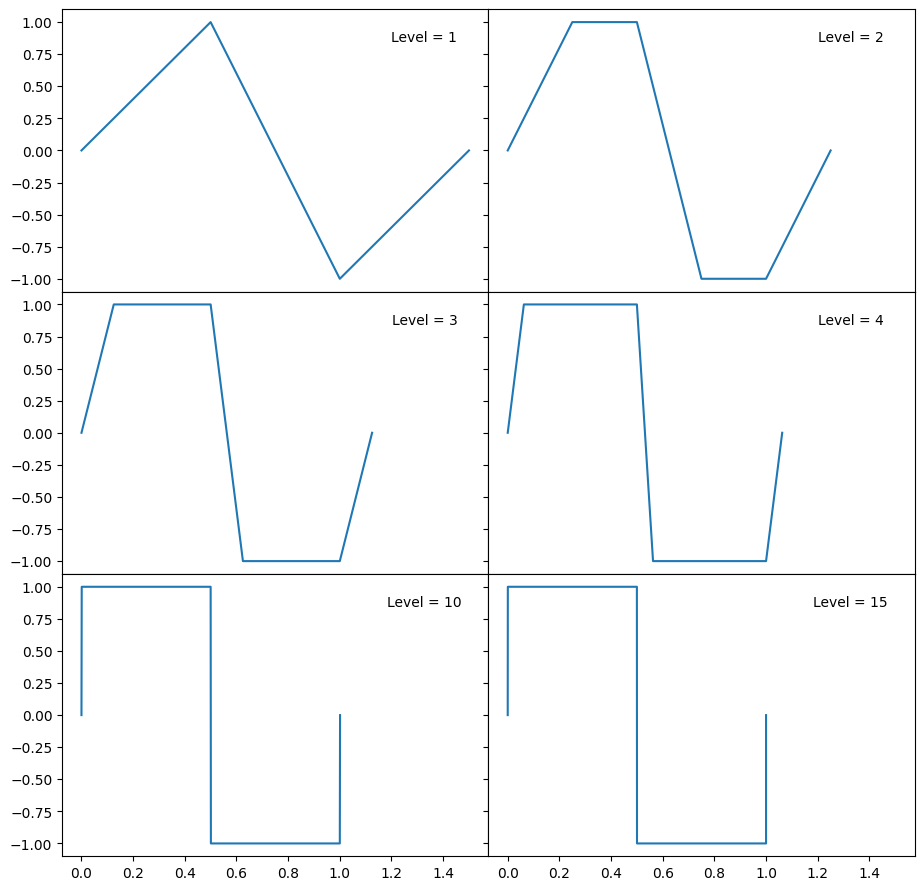

In [ ]:
import matplotlib.pyplot as plt

def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

plot_wavelet(wavelet)

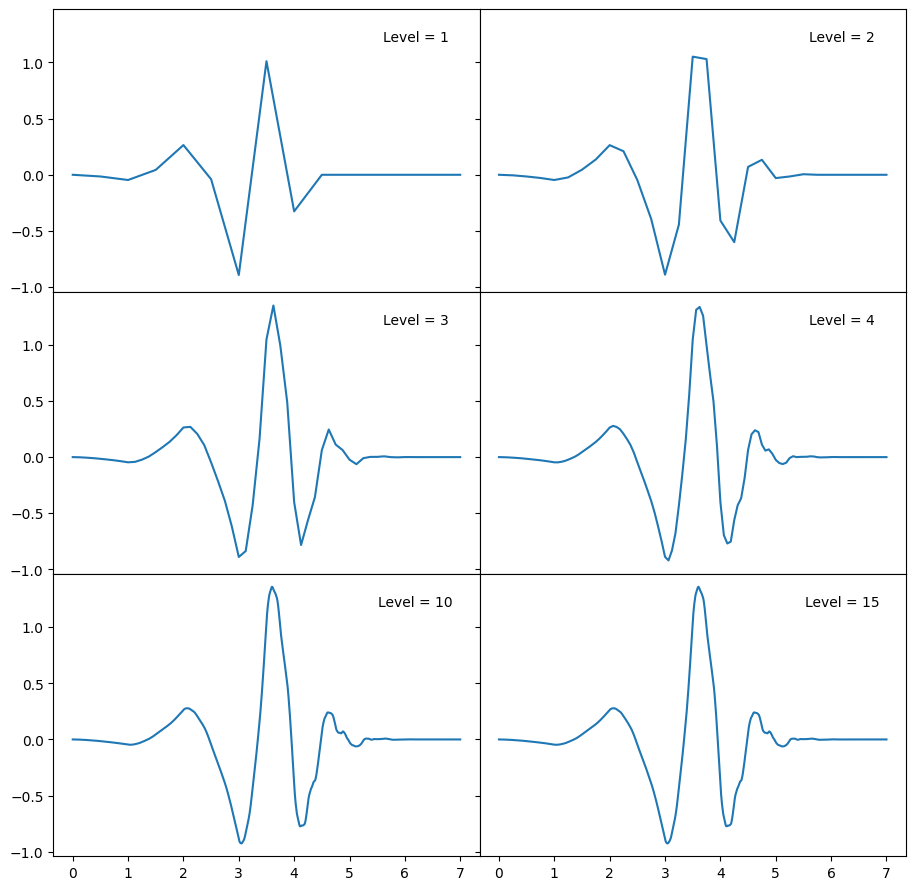

In [ ]:
plot_wavelet(Wavelet('db4'))

In [ ]:
import numpy as np
import pandas as pd
from pywt import wavedec

# Step 1: Inspect the DataFrame for non-numeric columns
print("Columns in the DataFrame:", baseline_df.columns)

# Step 2: Drop non-numeric columns (e.g., metadata or labels)
# This assumes that all non-numeric columns are irrelevant for wavelet transformation
numeric_df = baseline_df.select_dtypes(include=[np.number])

print("Shape after dropping non-numeric columns:", numeric_df.shape)

# Step 3: Transpose the data to get time-series format (time points should be columns)
data_t = numeric_df.transpose()

# Step 4: Perform wavelet decomposition on numeric data
level = 6  # Number of decomposition levels
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

# Output the type of coeffs_list and the first array of coefficients
print(type(coeffs_list))

# Display the first array of coefficients
print("\nExample first array of wavelet coefficients:")
print(coeffs_list[0])

Columns in the DataFrame: Index(['LMacro_01', 'LMacro_02', 'LMacro_03', 'LMacro_04', 'LMacro_05',
       'LMacro_06', 'LMacro_07', 'LMacro_08', 'RMacro_01', 'RMacro_02',
       'RMacro_03', 'RMacro_04', 'RMacro_05', 'RMacro_06', 'RMacro_07',
       'RMacro_08'],
      dtype='object')
Shape after dropping non-numeric columns: (5000, 16)
<class 'list'>

Example first array of wavelet coefficients:
[[  631.81174729   630.92074308   631.1326659  ... -1010.45755657
   -977.44682753  -963.51206126]
 [ -299.24691003  -299.37257224  -299.29961289 ...  -443.84261265
   -394.04341899  -370.31021643]
 [ -313.91678164  -313.62393899  -313.16481931 ...  -459.53975283
   -369.08579482  -338.37156044]
 ...
 [  -89.21464      -90.09347737   -89.55805551 ...  -617.94945637
   -533.76788144  -504.91525106]
 [ -514.52900489  -515.73021976  -515.45984329 ...  -479.39619638
   -434.40741014  -414.91321547]
 [ -151.12417424  -152.01732176  -151.82534569 ...  -850.85274988
   -779.55969684  -748.4640068 ]]


In [ ]:
# make a list of the component names (later column rows)
nums = list(range(1,level+1))
names=[]
for num in nums:
    names.append('D' + str(num))
names.append('A' + str(nums[-1]))

# reverse the names so it counts down
names = names[::-1]

names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

In [ ]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]] * level_df.shape[1] #  create a list with the same name repeated for the number of columns
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

,A6,A6,A6,A6,A6,A6,A6,A6,A6,A6,...,D1,D1,D1,D1,D1,D1,D1,D1,D1,D1
0,631.811747,-299.246910,-313.916782,-377.181371,-187.577611,-129.100731,-189.696500,-233.478880,395.724038,606.538558,...,0.197632,-0.105637,-0.202242,0.140085,-0.184993,0.066717,0.039347,0.230515,4.348041e-02,0.200627
1,630.920743,-299.372572,-313.623939,-377.013365,-187.575093,-129.412807,-190.589912,-233.723780,394.411090,607.035214,...,0.681964,0.040962,-0.359064,0.400026,-0.440988,0.240975,0.122886,0.681964,5.551115e-16,0.522913
2,631.132666,-299.299613,-313.164819,-376.847970,-187.149356,-129.100731,-190.149611,-233.547120,394.699772,607.004519,...,0.202394,-0.017249,-0.161619,-0.340098,-0.055982,-0.107679,-0.885159,-0.512453,-4.844688e-01,-0.764502
3,632.958392,-298.067149,-313.219206,-377.026947,-188.779079,-129.975611,-190.109492,-234.578423,394.306841,606.324974,...,0.431344,0.590106,0.867433,0.635628,-0.420270,0.077791,0.116372,-0.025141,4.284867e-01,0.560355
4,622.173741,-306.384396,-317.114900,-377.125512,-179.814959,-123.855720,-188.693980,-227.608408,398.523104,609.132578,...,0.624893,0.245398,-0.064813,0.001904,-0.618242,-0.213129,-0.243970,0.307692,-1.101973e-01,0.391520


In [ ]:
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets.head()

,D6,D6,D6,D6,D6,D6,D6,D6,D6,D6,...,D1,D1,D1,D1,D1,D1,D1,D1,D1,D1
0,0.026542,-0.040636,0.018371,-0.057565,-0.012993,0.039096,0.042190,-0.174618,-0.073983,-0.099209,...,0.197632,-0.105637,-0.202242,0.140085,-0.184993,0.066717,0.039347,0.230515,4.348041e-02,0.200627
1,-0.119324,-0.194066,0.011376,-0.226309,-0.107259,-0.005016,-0.153093,-0.566669,-0.430003,-0.252902,...,0.681964,0.040962,-0.359064,0.400026,-0.440988,0.240975,0.122886,0.681964,5.551115e-16,0.522913
2,-5.213490,-1.087769,2.231215,1.128347,1.094197,-1.476326,-5.153656,0.192440,-5.814361,3.035876,...,0.202394,-0.017249,-0.161619,-0.340098,-0.055982,-0.107679,-0.885159,-0.512453,-4.844688e-01,-0.764502
3,17.773585,23.079299,18.655561,5.811242,-21.579303,-20.241690,-15.886930,-17.234714,-31.630093,0.789199,...,0.431344,0.590106,0.867433,0.635628,-0.420270,0.077791,0.116372,-0.025141,4.284867e-01,0.560355
4,-9.506469,-6.316135,-12.116778,7.845615,23.016398,25.194309,26.225688,28.662652,-0.981503,-0.420630,...,0.624893,0.245398,-0.064813,0.001904,-0.618242,-0.213129,-0.243970,0.307692,-1.101973e-01,0.391520


In [ ]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # Select only numeric columns before transpose
  data = data.select_dtypes(include=[np.number]) # This line is added

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seizure_df, level=5, output=True)

channel LMacro_01                                             LMacro_02  \
level          D1        D2         D3         D4          D5        D1   
sample                                                                    
0        0.396507 -3.236972  11.194758  -0.458059   -0.920481 -0.011399   
1        0.968698 -8.870880  35.356568  -3.683040   -5.064200  0.004797   
2       -0.965179  6.834787 -17.343680 -28.350231  -45.380752  0.688565   
3        0.181524 -0.432810   0.728332  37.380978  116.364461 -0.887338   
4        0.342003 -0.207657  -0.206273 -25.991252 -108.913549 -0.270538   

channel                                             ... RMacro_07            \
level          D2         D3         D4         D5  ...        D1        D2   
sample                                              ...                       
0       -2.360153  11.557247  -0.599190  -0.866623  ...  0.639422 -0.679114   
1       -5.999635  36.369329  -4.321810  -5.012190  ...  1.282003 -1.582755   
2        6.560404 -19.479394 -31.400661 -47.564681  ... -0.275561  4.097115   
3        0.059711   2.794239  33.577536  91.555070  ... -0.059162 -0.248824   
4       -0.393996   0.673767 -26.484827 -49.750741  ... -0.602558  1.081456   

channel                                  RMacro_08                       \
level           D3         D4         D5        D1        D2         D3   
sample                                                                    
0         3.148903  -0.231744  -0.357253  0.441790 -0.447398   3.297981   
1        10.068949  -1.122385  -1.146189  0.600039 -0.833184  10.517370   
2        -2.588474  -2.528057  -2.703724 -0.477955  3.857082  -2.616638   
3        -5.418694   1.002048  -4.943635 -0.260128 -2.190204  -5.388046   
4         3.114944 -12.823927  12.753129  0.141989  0.720808   3.843068   

channel                        
level           D4         D5  
sample                         
0        -0.275130  -0.366236  
1        -1.266563  -1.162497  
2        -2.374287  -2.276077  
3         1.049893 -14.510362  
4       -10.987170  13.411365  

[5 rows x 80 columns]

## Log Sum

In [ ]:
import pandas as pd
from pywt import wavedec
import numpy as np

# Function to subtract the smallest value
def minus_small(x):
    '''Takes a pandas series and subtracts the smallest number (other than 0).'''
    no_zeros = x[x != 0]  # Remove zeros
    result = no_zeros - no_zeros.min()  # Subtract the minimum value
    return result

# Function to reformat the DataFrame
def reformat(data, feature_name):
    data.index = [feature_name + level for level in data.index]
    data.index.name = 'feature'
    data = pd.DataFrame(data.unstack()).T
    return data

# Function to calculate log of sum per channel
def log_sum_channels(data, output=False):
    # Calculate the absolute sum for each channel
    absolute_sums = data.sum()

    # Unstack the DataFrame to make channels the columns
    absolute_sums = absolute_sums.unstack('channel')

    # Apply minus_small to each channel
    absolute_sums_minus = absolute_sums.apply(minus_small)

    # Apply log transformation to each channel
    absolute_sums_log = absolute_sums_minus.apply(np.log)

    # Reformat the DataFrame
    absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

    if output:
        display(absolute_sums_log.head())  # Optionally display the result

    return absolute_sums_log

# Assuming 'example_wavelets' is already defined from previous code
# Apply the log_sum_channels function to wavelet data
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)

print("Patient1.csv has been updated successfully!")

channel LMacro_01                                       LMacro_02            \
feature   LSWT_D1   LSWT_D2   LSWT_D3   LSWT_D4 LSWT_D5   LSWT_D1   LSWT_D2   
0        4.949442  4.906854  4.594612  5.503116    -inf  3.663372  4.208758   

channel                              ... RMacro_07                    \
feature   LSWT_D3   LSWT_D4 LSWT_D5  ...   LSWT_D1   LSWT_D2 LSWT_D3   
0        3.049835  5.355094    -inf  ...  3.646556  3.171315    -inf   

channel                     RMacro_08                                        
feature   LSWT_D4   LSWT_D5   LSWT_D1   LSWT_D2 LSWT_D3   LSWT_D4   LSWT_D5  
0        5.244895  4.477367  4.005556  4.401302    -inf  5.337417  4.402701  

[1 rows x 80 columns]

Patient1.csv has been updated successfully!


Average power of the wavelet coefficients in each sub-band

In [ ]:
from pywt import wavedec

def ave(data, output=False):
    # get the mean
    mean_data = data.mean()

    # Convert the MultiIndex to a simple Index before adding '_mean'
    mean_data.index = [str(level) + '_mean' for level in mean_data.index]

    if output:
        display(mean_data)

    return mean_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Wavelets'+color.END)
baseline_mean = ave(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Wavelets'+color.END)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5)

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Wavelets


,0
"('LMacro_01', 'D1')_mean",-0.007707
"('LMacro_01', 'D2')_mean",-0.024667
"('LMacro_01', 'D3')_mean",-0.162905
"('LMacro_01', 'D4')_mean",0.584580
"('LMacro_01', 'D5')_mean",-1.794687
...,...
"('RMacro_08', 'D1')_mean",0.002715
"('RMacro_08', 'D2')_mean",0.047709
"('RMacro_08', 'D3')_mean",-0.161951
"('RMacro_08', 'D4')_mean",0.965892



Seizure Mean Wavelets


,0
"('LMacro_01', 'D1')_mean",-0.007707
"('LMacro_01', 'D2')_mean",-0.024667
"('LMacro_01', 'D3')_mean",-0.162905
"('LMacro_01', 'D4')_mean",0.584580
"('LMacro_01', 'D5')_mean",-1.794687
...,...
"('RMacro_08', 'D1')_mean",0.002715
"('RMacro_08', 'D2')_mean",0.047709
"('RMacro_08', 'D3')_mean",-0.161951
"('RMacro_08', 'D4')_mean",0.965892


In [ ]:
import pandas as pd

# Assuming minus_small and reformat functions are already defined

# Function to calculate mean across channels
def ave_channels(data, output=False):
    # Get the mean for each channel
    mean_data = data.mean()

    # Reshape data to have channels as columns
    mean_data = mean_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_data = reformat(mean_data, 'Mean_')

    # Display the result if output is True
    if output:
        display(mean_data.head())

    return mean_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call ave_channels to compute the mean wavelets across channels
example_wavelet_mean = ave_channels(example_wavelets, output=True)

channel LMacro_01                                        LMacro_02            \
feature   Mean_D1   Mean_D2   Mean_D3  Mean_D4   Mean_D5   Mean_D1   Mean_D2   
0       -0.007707 -0.024667 -0.162905  0.58458 -1.794687  -0.00981  0.025379   

channel                                ... RMacro_07                      \
feature   Mean_D3   Mean_D4   Mean_D5  ...   Mean_D1   Mean_D2   Mean_D3   
0       -0.094882  0.990121 -0.610527  ... -0.009453 -0.041822 -0.157819   

channel                     RMacro_08                                          
feature   Mean_D4   Mean_D5   Mean_D1   Mean_D2   Mean_D3   Mean_D4   Mean_D5  
0        0.860552  0.450192  0.002715  0.047709 -0.161951  0.965892  0.359177  

[1 rows x 80 columns]

Mean of the absolute values of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_mean_abs' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) #

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


,0
"('LMacro_01', 'D1')_mean_abs",0.844344
"('LMacro_01', 'D2')_mean_abs",1.841227
"('LMacro_01', 'D3')_mean_abs",4.155438
"('LMacro_01', 'D4')_mean_abs",11.288221
"('LMacro_01', 'D5')_mean_abs",73.617494
...,...
"('RMacro_08', 'D1')_mean_abs",0.815891
"('RMacro_08', 'D2')_mean_abs",1.581290
"('RMacro_08', 'D3')_mean_abs",3.358858
"('RMacro_08', 'D4')_mean_abs",5.676737



Seizure Mean Absolute Wavelets


,0
"('LMacro_01', 'D1')_mean_abs",0.844344
"('LMacro_01', 'D2')_mean_abs",1.841227
"('LMacro_01', 'D3')_mean_abs",4.155438
"('LMacro_01', 'D4')_mean_abs",11.288221
"('LMacro_01', 'D5')_mean_abs",73.617494
...,...
"('RMacro_08', 'D1')_mean_abs",0.815891
"('RMacro_08', 'D2')_mean_abs",1.581290
"('RMacro_08', 'D3')_mean_abs",3.358858
"('RMacro_08', 'D4')_mean_abs",5.676737


,0
"('LMacro_01', 'D1')_mean",-0.007707
"('LMacro_01', 'D2')_mean",-0.024667
"('LMacro_01', 'D3')_mean",-0.162905
"('LMacro_01', 'D4')_mean",0.584580
"('LMacro_01', 'D5')_mean",-1.794687
...,...
"('RMacro_08', 'D1')_mean",0.002715
"('RMacro_08', 'D2')_mean",0.047709
"('RMacro_08', 'D3')_mean",-0.161951
"('RMacro_08', 'D4')_mean",0.965892


In [ ]:
import pandas as pd

# Function to calculate mean of the absolute values across channels
def mean_abs_channels(data, output=False):
    # Get the mean of absolute values for each channel
    mean_abs_data = data.abs().mean()

    # Reshape data to have channels as columns
    mean_abs_data = mean_abs_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_abs_data = reformat(mean_abs_data, 'Mean_Abs_')

    # Display the result if output is True
    if output:
        display(mean_abs_data.head())

    return mean_abs_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call mean_abs_channels to compute the mean absolute wavelets across channels
example_mean_abs = mean_abs_channels(example_wavelets, output=True)

channel   LMacro_01                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.844344    1.841227    4.155438   11.288221   73.617494   

channel   LMacro_02                                                  ...  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  ...   
0          0.901721    1.840699    4.227797    11.81398   45.310454  ...   

channel   RMacro_07                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.905356    1.755426    3.343986    5.532801   10.345108   

channel   RMacro_08                                                  
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  
0          0.815891     1.58129    3.358858    5.676737   11.404743  

[1 rows x 80 columns]

Standard deviation of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_std' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


,0
"('LMacro_01', 'D1')_std",0.844344
"('LMacro_01', 'D2')_std",1.841227
"('LMacro_01', 'D3')_std",4.155438
"('LMacro_01', 'D4')_std",11.288221
"('LMacro_01', 'D5')_std",73.617494
...,...
"('RMacro_08', 'D1')_std",0.815891
"('RMacro_08', 'D2')_std",1.581290
"('RMacro_08', 'D3')_std",3.358858
"('RMacro_08', 'D4')_std",5.676737



Seizure Mean Absolute Wavelets


,0
"('LMacro_01', 'D1')_std",0.844344
"('LMacro_01', 'D2')_std",1.841227
"('LMacro_01', 'D3')_std",4.155438
"('LMacro_01', 'D4')_std",11.288221
"('LMacro_01', 'D5')_std",73.617494
...,...
"('RMacro_08', 'D1')_std",0.815891
"('RMacro_08', 'D2')_std",1.581290
"('RMacro_08', 'D3')_std",3.358858
"('RMacro_08', 'D4')_std",5.676737


,0
"('LMacro_01', 'D1')_mean",-0.007707
"('LMacro_01', 'D2')_mean",-0.024667
"('LMacro_01', 'D3')_mean",-0.162905
"('LMacro_01', 'D4')_mean",0.584580
"('LMacro_01', 'D5')_mean",-1.794687
...,...
"('RMacro_08', 'D1')_mean",0.002715
"('RMacro_08', 'D2')_mean",0.047709
"('RMacro_08', 'D3')_mean",-0.161951
"('RMacro_08', 'D4')_mean",0.965892


In [ ]:
import pandas as pd

# Function to calculate the standard deviation of wavelet coefficients across channels
def coeff_std_channels(data, output=False):
    # Get the standard deviation for each channel
    std_data = data.std()

    # Reshape data to have channels as columns
    std_data = std_data.unstack('channel')

    # Reformat the DataFrame for saving
    std_data = reformat(std_data, 'STD_')

    # Display the result if output is True
    if output:
        display(std_data.head())

    return std_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call coeff_std_channels to compute the standard deviation of wavelets across channels
example_std = coeff_std_channels(example_wavelets, output=True)

channel LMacro_01                                          LMacro_02  \
feature    STD_D1    STD_D2    STD_D3    STD_D4     STD_D5    STD_D1   
0        1.047873  2.355999  5.509443  15.46245  92.122182  1.143894   

channel                                            ... RMacro_07            \
feature    STD_D2    STD_D3     STD_D4     STD_D5  ...    STD_D1    STD_D2   
0        2.338461  5.710597  15.627994  55.809702  ...  1.155157  2.252725   

channel                                RMacro_08                      \
feature    STD_D3    STD_D4     STD_D5    STD_D1    STD_D2    STD_D3   
0        4.445884  7.196825  14.299178  1.043908  2.094122  4.415351   

channel                       
feature    STD_D4     STD_D5  
0        7.295452  15.652416  

[1 rows x 80 columns]

Ratio of the absolute mean values of adjacent sub-bands

In [ ]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index = [str(level) + '_Ratio' for level in ratio_data.index]

    if output:
        display(ratio_data)

    return ratio_data


print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
baseline_ratio = ratio(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
seizure_ratio = ratio(seizure_wavelets, output=True)


Baseline Ratio Wavelets


,0
"('LMacro_01', 'D1')_Ratio",0.458577
"('LMacro_01', 'D2')_Ratio",0.736523
"('LMacro_01', 'D3')_Ratio",0.632995
"('LMacro_01', 'D4')_Ratio",0.290287
"('LMacro_01', 'D5')_Ratio",12.078399
...,...
"('RMacro_08', 'D1')_Ratio",0.136821
"('RMacro_08', 'D2')_Ratio",0.757550
"('RMacro_08', 'D3')_Ratio",0.925557
"('RMacro_08', 'D4')_Ratio",0.769018



Seizure Ratio Wavelets


,0
"('LMacro_01', 'D1')_Ratio",0.458577
"('LMacro_01', 'D2')_Ratio",0.736523
"('LMacro_01', 'D3')_Ratio",0.632995
"('LMacro_01', 'D4')_Ratio",0.290287
"('LMacro_01', 'D5')_Ratio",12.078399
...,...
"('RMacro_08', 'D1')_Ratio",0.136821
"('RMacro_08', 'D2')_Ratio",0.757550
"('RMacro_08', 'D3')_Ratio",0.925557
"('RMacro_08', 'D4')_Ratio",0.769018


In [ ]:
import pandas as pd

def ratio_channels(epoch_data):
    # Get decimation levels (wavelet decomposition levels)
    decimation_levels = list(epoch_data.index)

    # Initialize an empty Series to store the ratio data
    ratio_data = pd.Series()

    # Iterate through each decimation level
    for level_no in range(0, len(decimation_levels)):
        # For the first decimation level, take the ratio with the next level
        if level_no == 0:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no + 1]]
        # For the last decimation level, take the ratio with the previous level
        elif level_no == len(decimation_levels) - 1:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no - 1]]
        # For all intermediate decimation levels, take the ratio with the average of previous and next levels
        else:
            before = epoch_data.loc[decimation_levels[level_no - 1]]
            after = epoch_data.loc[decimation_levels[level_no + 1]]
            mean_data = (before + after) / 2

            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / mean_data

    # Name the index column as 'features'
    ratio_data.index.name = 'features'

    return ratio_data

# Assuming `example_wavelets` contains the wavelet coefficient data

# Calculate the ratio of adjacent wavelet decimation levels for each channel
example_ratio_data = example_wavelets.mean().unstack('channel').apply(ratio_channels)

# Reformat the result to add 'Ratio_Mean_' prefix for easy identification of features
example_ratio_data = reformat(example_ratio_data, 'Ratio_Mean_')

# Display the head of the ratio data to check the result
display(example_ratio_data.head())

channel     LMacro_01                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            0.312456      0.289161     -0.581896     -0.597243     -3.070047   

channel     LMacro_02                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0           -0.386534     -0.484831     -0.186867     -2.807224     -0.616619   

channel  ...     RMacro_07                                            \
feature  ... Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0        ...      0.226022      0.500045     -0.385522      5.886679   

channel                   RMacro_08                                            \
feature Ratio_Mean_D5 Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0            0.523143      0.056911     -0.599227     -0.319555      9.794741   

channel                
feature Ratio_Mean_D5  
0            0.371861  

[1 rows x 80 columns]

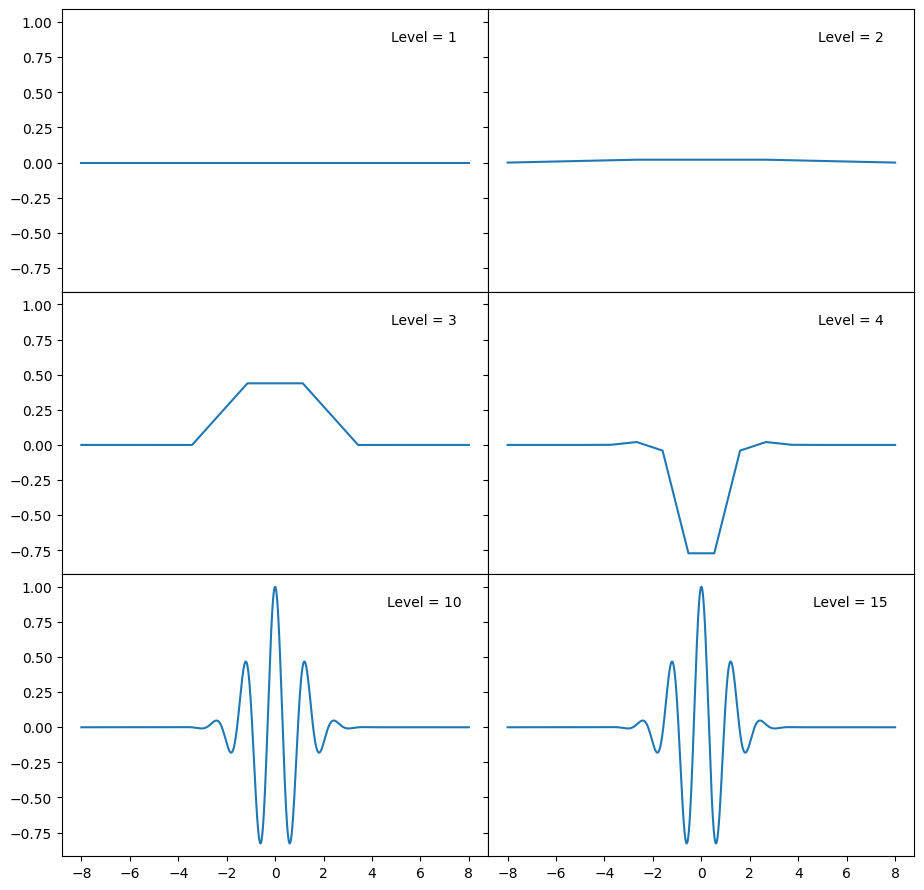

In [ ]:
from pywt import ContinuousWavelet

plot_wavelet(ContinuousWavelet('morl'))

In [ ]:
from pywt import scale2frequency, cwt

def cwt_wavelet_decompose(data, freq, waveletname, output=False):

    scales = np.arange(0.25, (freq/20)+0.25, 0.1)
    frequencies = scale2frequency(waveletname, scales) / (freq*0.0001)  # 100 Hz sampling is 0.01

    # transpose the data
    data_t = data.transpose()

    # get the wavelet coefficients at each level in a list
    coeffs_list = cwt(data_t.values, scales, waveletname)

    decom_wavelets = pd.DataFrame(coeffs_list[0][:,0,:], index =np.round(frequencies, 2)).T

    if output:
        display(decom_wavelets.head())

    return decom_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Wavelets'+color.END)
baseline_wavelets = cwt_wavelet_decompose(baseline_df, 5000, 'morl', output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Wavelets'+color.END)
seizure_wavelets = cwt_wavelet_decompose(seizure_df, 5000, 'morl',  output=True)

Baseline Wavelets


,6.50,4.64,3.61,2.95,2.50,2.17,1.91,1.71,1.55,1.41,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
0,-0.000199,-0.671361,0.437605,-2.648191,12.520131,-0.006183,-9.421545,1.775553,15.112983,12.683441,...,-34.483583,-34.590474,-34.832750,-34.034935,-34.208338,-33.986903,-34.315608,-34.276441,-33.436843,-33.368018
1,0.000916,-0.008098,-0.011022,-0.162669,1.366685,0.457462,-1.068047,3.489457,0.730072,-9.245790,...,-33.801897,-33.644256,-33.823029,-32.004573,-32.553584,-32.933769,-33.378672,-33.197759,-31.806615,-32.155301
2,0.000016,-0.000198,0.000400,0.000734,-0.001193,0.081383,0.009500,0.270873,-1.030780,0.653443,...,-12.481884,-31.276584,-32.033883,-11.875221,-12.114843,-11.913704,-31.307864,-31.678920,-11.618852,-12.358719
3,0.000012,0.038187,-0.083874,-0.073283,-0.029659,0.007134,0.139830,0.122230,0.013177,0.157676,...,-11.219768,-11.812082,-12.203242,-10.994813,-11.407594,-11.083369,-11.554624,-11.601579,-10.486026,-11.277041
4,-0.000019,-0.029712,0.078100,0.104305,-0.134657,-0.007097,-0.079601,-0.234743,-0.305672,-0.199393,...,-9.757863,-10.839209,-10.730219,-9.874590,-9.603141,-9.812842,-9.996630,-10.269270,-9.362549,-9.225101



Seizure Wavelets


,6.50,4.64,3.61,2.95,2.50,2.17,1.91,1.71,1.55,1.41,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
0,0.000156,0.662452,-0.186732,3.537456,-15.227347,-0.022335,10.709341,-3.050510,-18.977447,-15.626682,...,203.251431,204.443570,204.759670,202.380221,201.588816,199.636079,200.816283,200.741651,199.106614,197.998654
1,-0.001216,-0.175549,0.363156,0.330337,-0.898341,-0.588849,0.015350,-5.009944,-0.533561,11.900024,...,200.482820,201.188566,201.764017,199.031996,198.855221,197.528256,198.489252,198.426328,194.981786,195.323100
2,-0.000058,-0.183648,0.348047,0.133405,0.808815,-0.102053,-1.290718,-0.827089,1.682163,-0.686176,...,172.708696,197.155949,198.050005,171.439342,171.266600,169.701892,193.907602,194.698755,167.986945,168.452463
3,-0.000042,-0.183841,0.348466,0.134293,0.802785,-0.003014,-1.285080,-0.505978,0.345716,-0.129947,...,169.200708,170.204215,170.684038,167.258954,167.417530,166.726817,166.431292,167.769555,163.265471,164.420019
4,-0.000026,-0.145835,0.265210,0.062889,0.775255,0.005811,-1.116999,-0.345170,0.401281,0.149532,...,165.107275,165.633168,166.392675,163.309115,163.574195,162.329675,161.688623,163.402202,159.959895,160.432525


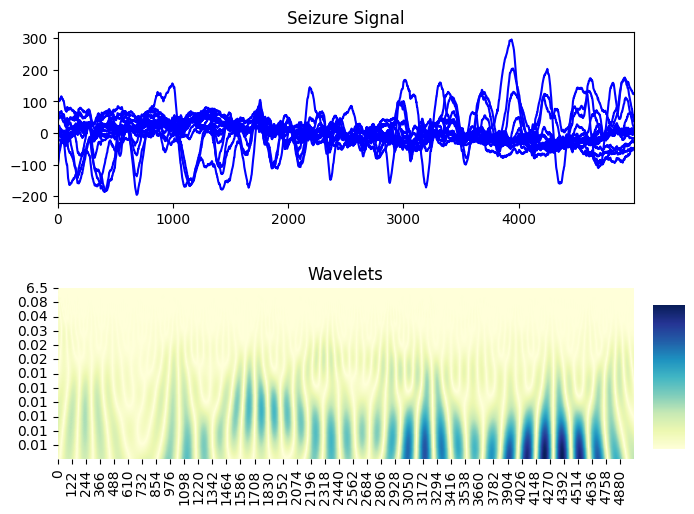

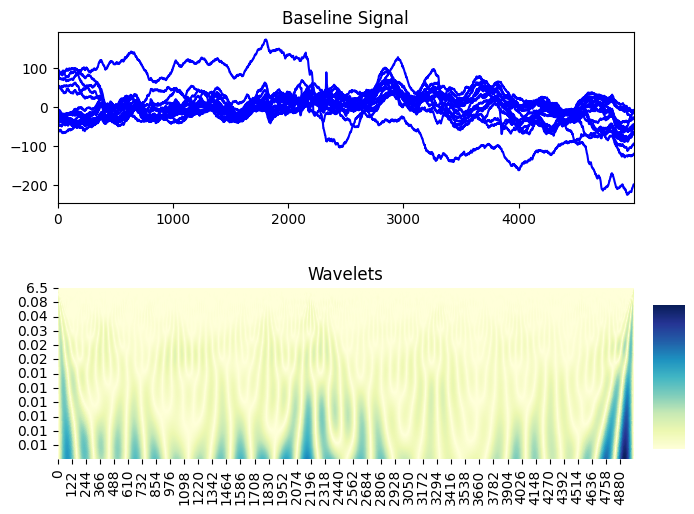

In [ ]:
#!pip install seaborn
import seaborn as sns
import pandas as pd


def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  #The seaborn module was not imported causing the error.
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

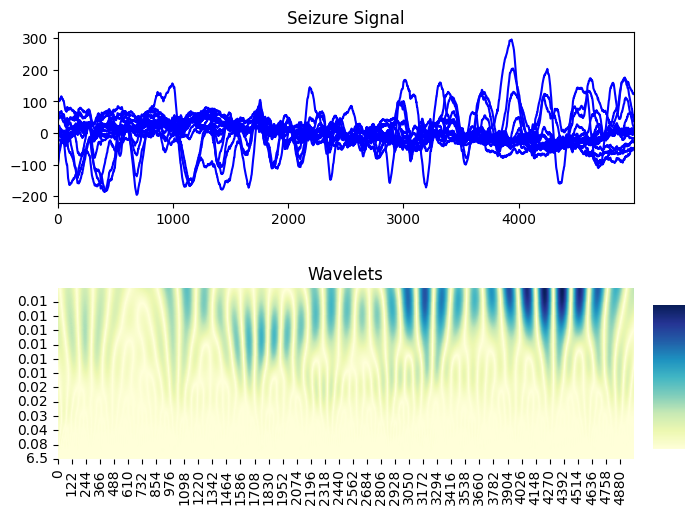

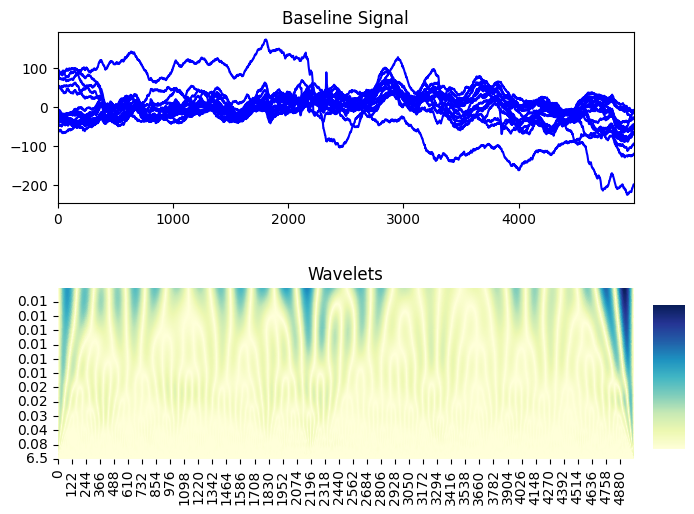

In [ ]:
def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  spec_ax.invert_yaxis()
  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

In [ ]:
!git clone https://github.com/raphaelvallat/entropy.git entropy/

Cloning into 'entropy'...
remote: Enumerating objects: 1487, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1487 (delta 0), reused 0 (delta 0), pack-reused 1477 (from 1)
Receiving objects: 100% (1487/1487), 3.38 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (953/953), done.


In [ ]:
from entropy.entropy import sample_entropy
baseline_sam = np.apply_along_axis(sample_entropy, 0, baseline_df)
seizure_sam = np.apply_along_axis(sample_entropy, 0, seizure_df)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_sam)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_sam)

Baseline


array([0.02039617, 0.08391909, 0.07627977, 0.06522442, 0.09543814,
       0.09649442, 0.08424933, 0.07106302, 0.03290584, 0.06367309,
       0.06083998, 0.07774771, 0.07390085, 0.07922252, 0.07124442,
       0.06116879])

Seizure


array([0.05930769, 0.0725612 , 0.07293632, 0.17304547, 0.1850281 ,
       0.15041659, 0.16898872, 0.14850229, 0.06801739, 0.11922381,
       0.06469757, 0.06466927, 0.09011711, 0.14640227, 0.15646532,
       0.14137236])

In [ ]:
from entropy.entropy import spectral_entropy

baseline_spec = np.apply_along_axis(spectral_entropy, 0, baseline_df, 50000,
                                method='welch', nperseg = sample_rate)

seizure_spec = np.apply_along_axis(spectral_entropy, 0, seizure_df, 50000,
                                method='welch', nperseg = sample_rate)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_spec)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_spec)

Baseline


array([1.43218729, 1.5814603 , 1.55213108, 1.58898864, 1.80384104,
       1.64604451, 1.62268096, 1.89614379, 1.81362312, 1.74085188,
       1.76689335, 1.81752955, 1.72476059, 1.7252683 , 1.62641406,
       1.50361018])

Seizure


array([1.2286079 , 1.27703933, 1.35525663, 1.65244301, 1.6931892 ,
       2.02042363, 2.29224089, 2.27373464, 2.3723636 , 2.22817092,
       2.13654783, 2.36354785, 2.5860102 , 2.63857656, 2.44178749,
       2.14392307])

In [ ]:
def fft(time_data):
  return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))

example_fft = pd.DataFrame(fft(seizure_df.T),
                           index = seizure_df.columns
                          )
example_fft.columns.name = 'freq'
example_fft.head()

freq,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
channel,,,,,,,,,,,,,,,,,,,,,
LMacro_01,5.155802,4.428991,4.952595,4.963051,5.018632,4.933607,4.573225,4.335850,4.359381,4.781219,...,4.385527,3.660190,3.936795,3.977716,4.254463,3.859291,3.875231,3.628639,4.226006,3.920522
LMacro_02,5.091834,4.754117,4.348205,4.749003,4.786902,4.803509,4.037222,3.971507,4.138443,4.636390,...,3.665185,3.668130,3.601864,3.581013,3.915705,3.964001,3.194775,3.734109,3.569348,3.913184
LMacro_03,5.122546,4.922297,4.664167,4.754697,4.714542,4.754044,4.033466,4.027138,3.623096,4.373355,...,3.921200,3.893489,4.043191,3.997683,4.025334,4.152647,3.579398,3.736199,3.964112,3.849167
LMacro_04,4.124317,4.176202,4.275689,4.408950,4.211088,4.436430,4.019790,3.821993,3.955903,3.630553,...,3.970313,3.940330,4.287387,4.113205,4.243906,3.932108,3.504392,3.796894,3.849821,3.855945
LMacro_05,4.523608,4.526302,4.278152,4.125387,3.876381,4.162434,4.196435,4.052715,3.935282,4.127712,...,3.850376,3.449549,3.933996,3.581767,3.921158,3.191490,3.349334,3.537671,3.509503,3.621620


In [ ]:
from sklearn import preprocessing
example_scaled = pd.DataFrame(preprocessing.scale(example_fft, axis=0),
                              index = example_fft.index,
                              columns = example_fft.columns)
example_scaled.head()

freq,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
channel,,,,,,,,,,,,,,,,,,,,,
LMacro_01,1.269468,-0.232087,1.845822,2.073349,1.917555,2.081186,1.370498,1.221934,1.040679,1.983648,...,2.189632,0.806243,0.963472,1.325386,1.535473,0.989638,2.500926,1.047691,2.134713,1.557656
LMacro_02,1.030624,0.966380,0.192765,1.229627,1.426161,1.655217,-0.129760,-0.216744,0.298280,1.576192,...,0.349192,0.826344,0.331677,0.602988,0.892399,1.212955,-1.425506,1.485415,0.356484,1.533171
LMacro_03,1.145297,1.586320,1.056946,1.252068,1.272719,1.493258,-0.140271,0.002927,-1.433398,0.836182,...,1.003298,1.396888,1.164174,1.361746,1.100511,1.615282,0.793883,1.494086,1.425503,1.319550
LMacro_04,-2.581905,-1.163911,-0.005572,-0.110780,0.205123,0.453313,-0.178550,-0.807128,-0.315095,-1.253583,...,1.128780,1.515476,1.624811,1.572113,1.515432,1.144936,0.361079,1.745988,1.116003,1.342168
LMacro_05,-1.091025,0.126617,0.001167,-1.228520,-0.504637,-0.443811,0.315874,0.103923,-0.384386,0.145102,...,0.822346,0.272959,0.958192,0.604360,0.902750,-0.434588,-0.533652,0.670150,0.194423,0.560236


In [ ]:
example_corr_matrix = pd.DataFrame(np.corrcoef(example_scaled),
                                   index = example_scaled.index,
                                   columns = example_scaled.index)

example_corr_matrix.head()

channel,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
channel,,,,,,,,,,,,,,,,
LMacro_01,1.000000,-0.032611,-0.158391,-0.125008,-0.356900,-0.258235,-0.123225,-0.199662,0.052367,0.017255,-0.153645,-0.291343,0.082042,0.211194,0.245627,0.190625
LMacro_02,-0.032611,1.000000,0.585235,-0.043218,-0.205100,-0.158025,-0.058688,0.075499,-0.344903,-0.426762,-0.193705,-0.376415,0.043076,-0.079600,0.059397,0.079872
LMacro_03,-0.158391,0.585235,1.000000,0.219396,-0.013824,-0.014862,-0.119426,-0.075782,-0.150491,-0.321096,-0.342602,-0.402530,0.174705,-0.025024,-0.201490,-0.219764
LMacro_04,-0.125008,-0.043218,0.219396,1.000000,0.548925,0.104287,-0.192822,-0.323996,-0.190788,-0.051444,-0.091676,-0.382224,-0.105587,-0.269140,-0.216580,-0.245782
LMacro_05,-0.356900,-0.205100,-0.013824,0.548925,1.000000,0.649149,0.286493,0.112045,-0.188700,-0.196228,-0.133554,-0.245111,-0.210979,-0.414181,-0.502917,-0.459574


In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined and is a valid correlation matrix
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Calculate the eigenvalues
eigenvalues = np.linalg.eig(example_corr_matrix)[0]

# Convert eigenvalues to absolute values
eigenvalues = np.absolute(eigenvalues)

# Create a DataFrame for eigenvalues with appropriate indexing
# Convert index to string before concatenation
example_eigenvalues = pd.DataFrame(eigenvalues, index=example_corr_matrix.index.astype(str) + '|freq_eigen')

# Sort the DataFrame by eigenvalues
example_eigenvalues = example_eigenvalues.sort_values(by=0)

# Display the first few rows of the sorted eigenvalues
print(example_eigenvalues.head())

                                 0
channel                           
RMacro_01|freq_eigen  1.351834e-16
RMacro_02|freq_eigen  9.581116e-02
RMacro_03|freq_eigen  1.470176e-01
RMacro_04|freq_eigen  2.048325e-01
RMacro_05|freq_eigen  2.758433e-01


In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Create an upper triangular matrix with NaN below the diagonal
example_corr_nan = example_corr_matrix.where(np.triu(np.ones(example_corr_matrix.shape), k=1).astype(bool))

# Display the resulting DataFrame
print(example_corr_nan.head())

channel    LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
channel                                                                       
LMacro_01        NaN  -0.032611  -0.158391  -0.125008  -0.356900  -0.258235   
LMacro_02        NaN        NaN   0.585235  -0.043218  -0.205100  -0.158025   
LMacro_03        NaN        NaN        NaN   0.219396  -0.013824  -0.014862   
LMacro_04        NaN        NaN        NaN        NaN   0.548925   0.104287   
LMacro_05        NaN        NaN        NaN        NaN        NaN   0.649149   

channel    LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
channel                                                                       
LMacro_01  -0.123225  -0.199662   0.052367   0.017255  -0.153645  -0.291343   
LMacro_02  -0.058688   0.075499  -0.344903  -0.426762  -0.193705  -0.376415   
LMacro_03  -0.119426  -0.075782  -0.150491  -0.321096  -0.342602  -0.402530   
LMacro_04  -0.192822  -0.323996  -0.190788  -0.0514

In [ ]:
example_corr_stacked = example_corr_nan.stack()
# combine the multi_index to 1 index name
example_corr_stacked.index = ['_'.join(map(str,i)) for i in example_corr_stacked.index.tolist()]
# add the corr to the name
example_corr_stacked.index = example_corr_stacked.index+'|freq_corr'
example_corr_stacked.head()

,0
LMacro_01_LMacro_02|freq_corr,-0.032611
LMacro_01_LMacro_03|freq_corr,-0.158391
LMacro_01_LMacro_04|freq_corr,-0.125008
LMacro_01_LMacro_05|freq_corr,-0.356900
LMacro_01_LMacro_06|freq_corr,-0.258235


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
wav_mms = mms.fit_transform(seizure_wavelets)

sc = StandardScaler()
wav_scale = sc.fit_transform(seizure_wavelets)

print(color.BOLD+color.UNDERLINE+'Before Scaling'+color.END)
display(seizure_wavelets.head())
print(color.BOLD+color.UNDERLINE+'After MinMaxScaler'+color.END)
display(pd.DataFrame(wav_mms).head())
print(color.BOLD+color.UNDERLINE+'After StandardScaler'+color.END)
display(pd.DataFrame(wav_scale).head())

Before Scaling


,6.50,4.64,3.61,2.95,2.50,2.17,1.91,1.71,1.55,1.41,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
0,0.000156,0.662452,-0.186732,3.537456,-15.227347,-0.022335,10.709341,-3.050510,-18.977447,-15.626682,...,203.251431,204.443570,204.759670,202.380221,201.588816,199.636079,200.816283,200.741651,199.106614,197.998654
1,-0.001216,-0.175549,0.363156,0.330337,-0.898341,-0.588849,0.015350,-5.009944,-0.533561,11.900024,...,200.482820,201.188566,201.764017,199.031996,198.855221,197.528256,198.489252,198.426328,194.981786,195.323100
2,-0.000058,-0.183648,0.348047,0.133405,0.808815,-0.102053,-1.290718,-0.827089,1.682163,-0.686176,...,172.708696,197.155949,198.050005,171.439342,171.266600,169.701892,193.907602,194.698755,167.986945,168.452463
3,-0.000042,-0.183841,0.348466,0.134293,0.802785,-0.003014,-1.285080,-0.505978,0.345716,-0.129947,...,169.200708,170.204215,170.684038,167.258954,167.417530,166.726817,166.431292,167.769555,163.265471,164.420019
4,-0.000026,-0.145835,0.265210,0.062889,0.775255,0.005811,-1.116999,-0.345170,0.401281,0.149532,...,165.107275,165.633168,166.392675,163.309115,163.574195,162.329675,161.688623,163.402202,159.959895,160.432525


After MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.903750,0.961686,0.627868,1.000000,0.000000,0.815400,1.000000,0.243824,0.000000,0.000000,...,0.539524,0.539758,0.539763,0.539325,0.539511,0.538953,0.539138,0.539159,0.538926,0.538733
1,0.000000,0.135912,0.886193,0.332582,0.863698,0.000000,0.166189,0.000000,0.892751,1.000000,...,0.539013,0.539156,0.539210,0.538706,0.539006,0.538564,0.538708,0.538731,0.538164,0.538239
2,0.762636,0.127932,0.879095,0.291600,0.966599,0.700658,0.064355,0.520497,1.000000,0.542764,...,0.533882,0.538411,0.538524,0.533609,0.533908,0.533422,0.537861,0.538041,0.533175,0.533271
3,0.773451,0.127742,0.879292,0.291785,0.966235,0.843208,0.064795,0.560454,0.935311,0.562971,...,0.533234,0.533432,0.533468,0.532836,0.533197,0.532872,0.532784,0.533063,0.532302,0.532525
4,0.784267,0.165193,0.840180,0.276925,0.964576,0.855911,0.077900,0.580465,0.938001,0.573124,...,0.532478,0.532588,0.532675,0.532107,0.532487,0.532059,0.531908,0.532255,0.531691,0.531788


After StandardScaler


,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,4.107020,6.644382,-0.987015,33.690081,-31.676954,-1.661673,15.148745,-8.721624,-52.315529,-48.611188,...,0.198936,0.200089,0.200360,0.198151,0.197367,0.195426,0.196545,0.196452,0.194965,0.193846
1,-31.985388,-1.751202,1.894876,3.135712,-1.870990,-44.018081,0.027717,-14.330626,-1.466959,37.019869,...,0.196220,0.196895,0.197421,0.194865,0.194684,0.193357,0.194260,0.194179,0.190915,0.191219
2,-1.528568,-1.832336,1.815695,1.259532,1.680091,-7.621985,-1.819030,-2.356945,4.641644,-2.133729,...,0.168971,0.192938,0.193776,0.167787,0.167604,0.166039,0.189762,0.190518,0.164407,0.164830
3,-1.096631,-1.834269,1.817890,1.267990,1.667547,-0.217165,-1.811058,-1.437745,0.957149,-0.403392,...,0.165529,0.166491,0.166920,0.163685,0.163825,0.163118,0.162784,0.164073,0.159770,0.160870
4,-0.664694,-1.453509,1.381556,0.587725,1.610281,0.442711,-1.573396,-0.977422,1.110338,0.466019,...,0.161513,0.162005,0.162708,0.159808,0.160053,0.158801,0.158127,0.159784,0.156524,0.156954


In [ ]:
# get the shape of this data
orig_shape = seizure_wavelets.shape
# reshape to merge the levels and data
data_reshape = np.reshape(seizure_wavelets.values, (orig_shape[0], -1))
# scale across channels
SS = StandardScaler()
data_scaled = SS.fit_transform(data_reshape.T).T
# shape the data back to channels, levels, data
data_scaled = np.reshape(data_scaled, orig_shape)

pd.DataFrame(data_scaled, columns = seizure_wavelets.columns).head()

,6.50,4.64,3.61,2.95,2.50,2.17,1.91,1.71,1.55,1.41,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
0,-0.483509,-0.480614,-0.484326,-0.468046,-0.550075,-0.483608,-0.436695,-0.496845,-0.566469,-0.551821,...,0.404989,0.410200,0.411582,0.401181,0.397721,0.389185,0.394344,0.394018,0.386870,0.382027
1,-0.464607,-0.465353,-0.463047,-0.463188,-0.468447,-0.467122,-0.464536,-0.486046,-0.466885,-0.413666,...,0.393523,0.396544,0.399007,0.387313,0.386556,0.380877,0.384990,0.384721,0.369977,0.371438
2,-0.442513,-0.443312,-0.440996,-0.441931,-0.438988,-0.442957,-0.448136,-0.446116,-0.435183,-0.445502,...,0.309988,0.416506,0.420401,0.304457,0.303705,0.296887,0.402352,0.405800,0.289415,0.291443
3,-0.433407,-0.434197,-0.431910,-0.432830,-0.429957,-0.433420,-0.438929,-0.435581,-0.431921,-0.433965,...,0.293663,0.297975,0.300037,0.285319,0.286001,0.283033,0.281763,0.287513,0.268159,0.273120
4,-0.427799,-0.428421,-0.426667,-0.427530,-0.424490,-0.427774,-0.432567,-0.429272,-0.426086,-0.427161,...,0.276991,0.279236,0.282478,0.269316,0.270447,0.265135,0.262398,0.269713,0.255019,0.257036


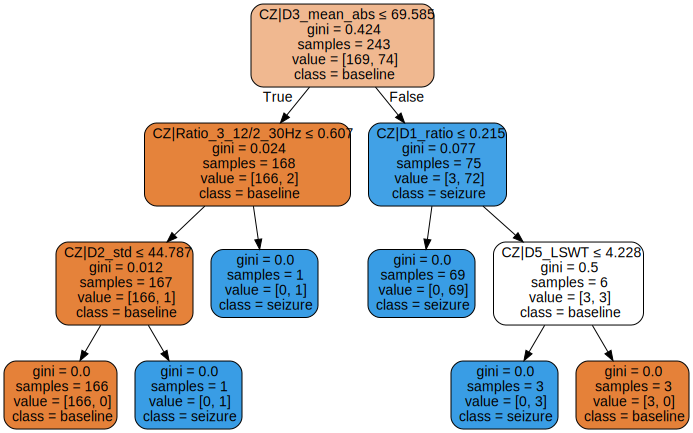

In [ ]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=feature_reduced_drop.columns,
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)